In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import pickle as pkl
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix    

from flip_gradient import flip_gradient
from utils import *
from data_loader import *
import random 
import math
import time
random.seed(1337)
np.random.seed(1337)
tf.set_random_seed(1337)

os.environ["CUDA_VISIBLE_DEVICES"]='0'
with tf.device('/gpu:0'):  
    gpu_option = tf.GPUOptions(allow_growth = True)
    config = tf.ConfigProto(gpu_options = gpu_option)
#     config.gpu_options.allow_growth = True
    sess = tf.Session(config = config )
    
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# print('session:',sess)


# DATA Balance Random

In [2]:
# #get Balance Data
# def indices_to_one_hot(data, nb_classes):
#     """Convert an iterable of indices to one-hot encoded labels."""
#     targets = np.array(data).reshape(-1)
#     return np.eye(nb_classes)[targets]

# dataloader = DataLoader_Random()
# pairs1, pairs2 ,same_pair, pairs_label, domain_labels = dataloader.getBalanceData(4000)
# same_pair = same_pair.reshape(-1,1)
# domain_labels_o = indices_to_one_hot(domain_labels[:,0],2)

# pairs1 = pairs1[3000:]
# pairs2 = pairs2[3000:]
# same_pair = same_pair[3000:]
# pairs_label = pairs_label[3000:]
# domain_labels_o = domain_labels_o[3000:]

# pairs1_test, pairs2_tset, same_pair_test, pairs_label_test, domain_labels_test = dataloader.getBalanceData(100)
# domain_labels_o_test = indices_to_one_hot(domain_labels_test[:,0],2)
# same_pair_test = same_pair_test.reshape(-1,1)

# Data Random

In [3]:
# #get Random Data
# def indices_to_one_hot(data, nb_classes):
#     """Convert an iterable of indices to one-hot encoded labels."""
#     targets = np.array(data).reshape(-1)
#     return np.eye(nb_classes)[targets]

# dataloader = DataLoader_Random()
# pairs1, pairs2 ,same_pair, pairs_label, domain_labels = dataloader.getRandomData(4000)
# same_pair = same_pair.reshape(-1,1)
# domain_labels_o = indices_to_one_hot(domain_labels[:,0],2)

# # pairs1_test, pairs2_tset, same_pair_test, pairs_label_test, domain_labels_test = dataloader.getBalanceData(100)
# # domain_labels_o_test = indices_to_one_hot(domain_labels_test[:,0],2)
# # same_pair_test = same_pair_test.reshape(-1,1)

# Data min selection

In [4]:
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

dataloader = DataLoader()
img_array, combine_label = dataloader.load_Casia()


suject nums from data:  ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124']
file 001-bg-01-000.jpg
file 001-bg-01-018.jpg
file 001-bg-01-036.jpg
file 001-bg-01-054.jpg
file 001-bg-01-

file 003-nm-06-036.jpg
file 003-nm-06-054.jpg
file 003-nm-06-072.jpg
file 003-nm-06-090.jpg
file 003-nm-06-108.jpg
file 003-nm-06-126.jpg
file 003-nm-06-144.jpg
file 003-nm-06-162.jpg
file 003-nm-06-180.jpg
file 004-bg-01-000.jpg
file 004-bg-01-018.jpg
file 004-bg-01-036.jpg
file 004-bg-01-054.jpg
file 004-bg-01-072.jpg
file 004-bg-01-090.jpg
file 004-bg-01-108.jpg
file 004-bg-01-126.jpg
file 004-bg-01-144.jpg
file 004-bg-01-162.jpg
file 004-bg-01-180.jpg
file 004-bg-02-000.jpg
file 004-bg-02-018.jpg
file 004-bg-02-036.jpg
file 004-bg-02-054.jpg
file 004-bg-02-072.jpg
file 004-bg-02-090.jpg
file 004-bg-02-108.jpg
file 004-bg-02-126.jpg
file 004-bg-02-144.jpg
file 004-bg-02-162.jpg
file 004-bg-02-180.jpg
file 004-cl-01-000.jpg
file 004-cl-01-018.jpg
file 004-cl-01-036.jpg
file 004-cl-01-054.jpg
file 004-cl-01-072.jpg
file 004-cl-01-090.jpg
file 004-cl-01-108.jpg
file 004-cl-01-126.jpg
file 004-cl-01-144.jpg
file 004-cl-01-162.jpg
file 004-cl-01-180.jpg
file 004-cl-02-000.jpg
file 004-cl

file 007-cl-01-162.jpg
file 007-cl-01-180.jpg
file 007-cl-02-000.jpg
file 007-cl-02-018.jpg
file 007-cl-02-036.jpg
file 007-cl-02-054.jpg
file 007-cl-02-072.jpg
file 007-cl-02-090.jpg
file 007-cl-02-108.jpg
file 007-cl-02-126.jpg
file 007-cl-02-144.jpg
file 007-cl-02-162.jpg
file 007-cl-02-180.jpg
file 007-nm-01-000.jpg
file 007-nm-01-018.jpg
file 007-nm-01-036.jpg
file 007-nm-01-054.jpg
file 007-nm-01-072.jpg
file 007-nm-01-090.jpg
file 007-nm-01-108.jpg
file 007-nm-01-126.jpg
file 007-nm-01-144.jpg
file 007-nm-01-162.jpg
file 007-nm-01-180.jpg
file 007-nm-02-000.jpg
file 007-nm-02-018.jpg
file 007-nm-02-036.jpg
file 007-nm-02-054.jpg
file 007-nm-02-072.jpg
file 007-nm-02-090.jpg
file 007-nm-02-108.jpg
file 007-nm-02-126.jpg
file 007-nm-02-144.jpg
file 007-nm-02-162.jpg
file 007-nm-02-180.jpg
file 007-nm-03-000.jpg
file 007-nm-03-018.jpg
file 007-nm-03-036.jpg
file 007-nm-03-054.jpg
file 007-nm-03-072.jpg
file 007-nm-03-090.jpg
file 007-nm-03-108.jpg
file 007-nm-03-126.jpg
file 007-nm

file 010-nm-02-126.jpg
file 010-nm-02-144.jpg
file 010-nm-02-162.jpg
file 010-nm-02-180.jpg
file 010-nm-03-000.jpg
file 010-nm-03-018.jpg
file 010-nm-03-036.jpg
file 010-nm-03-054.jpg
file 010-nm-03-072.jpg
file 010-nm-03-090.jpg
file 010-nm-03-108.jpg
file 010-nm-03-126.jpg
file 010-nm-03-144.jpg
file 010-nm-03-162.jpg
file 010-nm-03-180.jpg
file 010-nm-04-000.jpg
file 010-nm-04-018.jpg
file 010-nm-04-036.jpg
file 010-nm-04-054.jpg
file 010-nm-04-072.jpg
file 010-nm-04-090.jpg
file 010-nm-04-108.jpg
file 010-nm-04-126.jpg
file 010-nm-04-144.jpg
file 010-nm-04-162.jpg
file 010-nm-04-180.jpg
file 010-nm-05-000.jpg
file 010-nm-05-018.jpg
file 010-nm-05-036.jpg
file 010-nm-05-054.jpg
file 010-nm-05-072.jpg
file 010-nm-05-090.jpg
file 010-nm-05-108.jpg
file 010-nm-05-126.jpg
file 010-nm-05-144.jpg
file 010-nm-05-162.jpg
file 010-nm-05-180.jpg
file 010-nm-06-000.jpg
file 010-nm-06-018.jpg
file 010-nm-06-036.jpg
file 010-nm-06-054.jpg
file 010-nm-06-072.jpg
file 010-nm-06-090.jpg
file 010-nm

file 013-nm-05-054.jpg
file 013-nm-05-072.jpg
file 013-nm-05-090.jpg
file 013-nm-05-108.jpg
file 013-nm-05-126.jpg
file 013-nm-05-144.jpg
file 013-nm-05-162.jpg
file 013-nm-05-180.jpg
file 013-nm-06-000.jpg
file 013-nm-06-018.jpg
file 013-nm-06-036.jpg
file 013-nm-06-054.jpg
file 013-nm-06-072.jpg
file 013-nm-06-090.jpg
file 013-nm-06-108.jpg
file 013-nm-06-126.jpg
file 013-nm-06-144.jpg
file 013-nm-06-162.jpg
file 013-nm-06-180.jpg
file 014-bg-01-000.jpg
file 014-bg-01-018.jpg
file 014-bg-01-036.jpg
file 014-bg-01-054.jpg
file 014-bg-01-072.jpg
file 014-bg-01-090.jpg
file 014-bg-01-108.jpg
file 014-bg-01-126.jpg
file 014-bg-01-144.jpg
file 014-bg-01-162.jpg
file 014-bg-01-180.jpg
file 014-bg-02-000.jpg
file 014-bg-02-018.jpg
file 014-bg-02-036.jpg
file 014-bg-02-054.jpg
file 014-bg-02-072.jpg
file 014-bg-02-090.jpg
file 014-bg-02-108.jpg
file 014-bg-02-126.jpg
file 014-bg-02-144.jpg
file 014-bg-02-162.jpg
file 014-bg-02-180.jpg
file 014-cl-01-000.jpg
file 014-cl-01-018.jpg
file 014-cl

file 017-bg-02-180.jpg
file 017-cl-01-000.jpg
file 017-cl-01-018.jpg
file 017-cl-01-036.jpg
file 017-cl-01-054.jpg
file 017-cl-01-072.jpg
file 017-cl-01-090.jpg
file 017-cl-01-108.jpg
file 017-cl-01-126.jpg
file 017-cl-01-144.jpg
file 017-cl-01-162.jpg
file 017-cl-01-180.jpg
file 017-cl-02-000.jpg
file 017-cl-02-018.jpg
file 017-cl-02-036.jpg
file 017-cl-02-054.jpg
file 017-cl-02-072.jpg
file 017-cl-02-090.jpg
file 017-cl-02-108.jpg
file 017-cl-02-126.jpg
file 017-cl-02-144.jpg
file 017-cl-02-162.jpg
file 017-cl-02-180.jpg
file 017-nm-01-000.jpg
file 017-nm-01-018.jpg
file 017-nm-01-036.jpg
file 017-nm-01-054.jpg
file 017-nm-01-072.jpg
file 017-nm-01-090.jpg
file 017-nm-01-108.jpg
file 017-nm-01-126.jpg
file 017-nm-01-144.jpg
file 017-nm-01-162.jpg
file 017-nm-01-180.jpg
file 017-nm-02-000.jpg
file 017-nm-02-018.jpg
file 017-nm-02-036.jpg
file 017-nm-02-054.jpg
file 017-nm-02-072.jpg
file 017-nm-02-090.jpg
file 017-nm-02-108.jpg
file 017-nm-02-126.jpg
file 017-nm-02-144.jpg
file 017-nm

file 020-nm-02-018.jpg
file 020-nm-02-036.jpg
file 020-nm-02-054.jpg
file 020-nm-02-072.jpg
file 020-nm-02-090.jpg
file 020-nm-02-108.jpg
file 020-nm-02-126.jpg
file 020-nm-02-144.jpg
file 020-nm-02-162.jpg
file 020-nm-02-180.jpg
file 020-nm-03-000.jpg
file 020-nm-03-018.jpg
file 020-nm-03-036.jpg
file 020-nm-03-054.jpg
file 020-nm-03-072.jpg
file 020-nm-03-090.jpg
file 020-nm-03-108.jpg
file 020-nm-03-126.jpg
file 020-nm-03-144.jpg
file 020-nm-03-162.jpg
file 020-nm-03-180.jpg
file 020-nm-04-000.jpg
file 020-nm-04-018.jpg
file 020-nm-04-036.jpg
file 020-nm-04-054.jpg
file 020-nm-04-072.jpg
file 020-nm-04-090.jpg
file 020-nm-04-108.jpg
file 020-nm-04-126.jpg
file 020-nm-04-144.jpg
file 020-nm-04-162.jpg
file 020-nm-04-180.jpg
file 020-nm-05-000.jpg
file 020-nm-05-018.jpg
file 020-nm-05-036.jpg
file 020-nm-05-054.jpg
file 020-nm-05-072.jpg
file 020-nm-05-090.jpg
file 020-nm-05-108.jpg
file 020-nm-05-126.jpg
file 020-nm-05-144.jpg
file 020-nm-05-162.jpg
file 020-nm-05-180.jpg
file 020-nm

file 023-nm-04-108.jpg
file 023-nm-04-126.jpg
file 023-nm-04-144.jpg
file 023-nm-04-162.jpg
file 023-nm-04-180.jpg
file 023-nm-05-000.jpg
file 023-nm-05-018.jpg
file 023-nm-05-036.jpg
file 023-nm-05-054.jpg
file 023-nm-05-072.jpg
file 023-nm-05-090.jpg
file 023-nm-05-108.jpg
file 023-nm-05-126.jpg
file 023-nm-05-144.jpg
file 023-nm-05-162.jpg
file 023-nm-05-180.jpg
file 023-nm-06-000.jpg
file 023-nm-06-018.jpg
file 023-nm-06-036.jpg
file 023-nm-06-054.jpg
file 023-nm-06-072.jpg
file 023-nm-06-090.jpg
file 023-nm-06-108.jpg
file 023-nm-06-126.jpg
file 023-nm-06-144.jpg
file 023-nm-06-162.jpg
file 023-nm-06-180.jpg
file 024-bg-01-000.jpg
file 024-bg-01-018.jpg
file 024-bg-01-036.jpg
file 024-bg-01-054.jpg
file 024-bg-01-072.jpg
file 024-bg-01-090.jpg
file 024-bg-01-108.jpg
file 024-bg-01-126.jpg
file 024-bg-01-144.jpg
file 024-bg-01-162.jpg
file 024-bg-01-180.jpg
file 024-bg-02-000.jpg
file 024-bg-02-018.jpg
file 024-bg-02-036.jpg
file 024-bg-02-054.jpg
file 024-bg-02-072.jpg
file 024-bg

file 027-bg-02-036.jpg
file 027-bg-02-054.jpg
file 027-bg-02-072.jpg
file 027-bg-02-090.jpg
file 027-bg-02-108.jpg
file 027-bg-02-126.jpg
file 027-bg-02-144.jpg
file 027-bg-02-162.jpg
file 027-bg-02-180.jpg
file 027-cl-01-000.jpg
file 027-cl-01-018.jpg
file 027-cl-01-036.jpg
file 027-cl-01-054.jpg
file 027-cl-01-072.jpg
file 027-cl-01-090.jpg
file 027-cl-01-108.jpg
file 027-cl-01-126.jpg
file 027-cl-01-144.jpg
file 027-cl-01-162.jpg
file 027-cl-01-180.jpg
file 027-cl-02-000.jpg
file 027-cl-02-018.jpg
file 027-cl-02-036.jpg
file 027-cl-02-054.jpg
file 027-cl-02-072.jpg
file 027-cl-02-090.jpg
file 027-cl-02-108.jpg
file 027-cl-02-126.jpg
file 027-cl-02-144.jpg
file 027-cl-02-162.jpg
file 027-cl-02-180.jpg
file 027-nm-01-000.jpg
file 027-nm-01-018.jpg
file 027-nm-01-036.jpg
file 027-nm-01-054.jpg
file 027-nm-01-072.jpg
file 027-nm-01-090.jpg
file 027-nm-01-108.jpg
file 027-nm-01-126.jpg
file 027-nm-01-144.jpg
file 027-nm-01-162.jpg
file 027-nm-01-180.jpg
file 027-nm-02-000.jpg
file 027-nm

file 030-nm-02-000.jpg
file 030-nm-02-018.jpg
file 030-nm-02-036.jpg
file 030-nm-02-054.jpg
file 030-nm-02-072.jpg
file 030-nm-02-090.jpg
file 030-nm-02-108.jpg
file 030-nm-02-126.jpg
file 030-nm-02-144.jpg
file 030-nm-02-162.jpg
file 030-nm-02-180.jpg
file 030-nm-03-000.jpg
file 030-nm-03-018.jpg
file 030-nm-03-036.jpg
file 030-nm-03-054.jpg
file 030-nm-03-072.jpg
file 030-nm-03-090.jpg
file 030-nm-03-108.jpg
file 030-nm-03-126.jpg
file 030-nm-03-144.jpg
file 030-nm-03-162.jpg
file 030-nm-03-180.jpg
file 030-nm-04-000.jpg
file 030-nm-04-018.jpg
file 030-nm-04-036.jpg
file 030-nm-04-054.jpg
file 030-nm-04-072.jpg
file 030-nm-04-090.jpg
file 030-nm-04-108.jpg
file 030-nm-04-126.jpg
file 030-nm-04-144.jpg
file 030-nm-04-162.jpg
file 030-nm-04-180.jpg
file 030-nm-05-000.jpg
file 030-nm-05-018.jpg
file 030-nm-05-036.jpg
file 030-nm-05-054.jpg
file 030-nm-05-072.jpg
file 030-nm-05-090.jpg
file 030-nm-05-108.jpg
file 030-nm-05-126.jpg
file 030-nm-05-144.jpg
file 030-nm-05-162.jpg
file 030-nm

file 033-nm-04-144.jpg
file 033-nm-04-162.jpg
file 033-nm-04-180.jpg
file 033-nm-05-000.jpg
file 033-nm-05-018.jpg
file 033-nm-05-036.jpg
file 033-nm-05-054.jpg
file 033-nm-05-072.jpg
file 033-nm-05-090.jpg
file 033-nm-05-108.jpg
file 033-nm-05-126.jpg
file 033-nm-05-144.jpg
file 033-nm-05-162.jpg
file 033-nm-05-180.jpg
file 033-nm-06-000.jpg
file 033-nm-06-018.jpg
file 033-nm-06-036.jpg
file 033-nm-06-054.jpg
file 033-nm-06-072.jpg
file 033-nm-06-090.jpg
file 033-nm-06-108.jpg
file 033-nm-06-126.jpg
file 033-nm-06-144.jpg
file 033-nm-06-162.jpg
file 033-nm-06-180.jpg
delete 34
file 035-bg-01-000.jpg
file 035-bg-01-018.jpg
file 035-bg-01-036.jpg
file 035-bg-01-054.jpg
file 035-bg-01-072.jpg
file 035-bg-01-090.jpg
file 035-bg-01-108.jpg
file 035-bg-01-126.jpg
file 035-bg-01-144.jpg
file 035-bg-01-162.jpg
file 035-bg-01-180.jpg
file 035-bg-02-000.jpg
file 035-bg-02-018.jpg
file 035-bg-02-036.jpg
file 035-bg-02-054.jpg
file 035-bg-02-072.jpg
file 035-bg-02-090.jpg
file 035-bg-02-108.jpg
f

file 038-bg-01-162.jpg
file 038-bg-01-180.jpg
file 038-bg-02-000.jpg
file 038-bg-02-018.jpg
file 038-bg-02-036.jpg
file 038-bg-02-054.jpg
file 038-bg-02-072.jpg
file 038-bg-02-090.jpg
file 038-bg-02-108.jpg
file 038-bg-02-126.jpg
file 038-bg-02-144.jpg
file 038-bg-02-162.jpg
file 038-bg-02-180.jpg
file 038-cl-01-000.jpg
file 038-cl-01-018.jpg
file 038-cl-01-036.jpg
file 038-cl-01-054.jpg
file 038-cl-01-072.jpg
file 038-cl-01-090.jpg
file 038-cl-01-108.jpg
file 038-cl-01-126.jpg
file 038-cl-01-144.jpg
file 038-cl-01-162.jpg
file 038-cl-01-180.jpg
file 038-cl-02-000.jpg
file 038-cl-02-018.jpg
file 038-cl-02-036.jpg
file 038-cl-02-054.jpg
file 038-cl-02-072.jpg
file 038-cl-02-090.jpg
file 038-cl-02-108.jpg
file 038-cl-02-126.jpg
file 038-cl-02-144.jpg
file 038-cl-02-162.jpg
file 038-cl-02-180.jpg
file 038-nm-01-000.jpg
file 038-nm-01-018.jpg
file 038-nm-01-036.jpg
file 038-nm-01-054.jpg
file 038-nm-01-072.jpg
file 038-nm-01-090.jpg
file 038-nm-01-108.jpg
file 038-nm-01-126.jpg
file 038-nm

file 041-nm-01-162.jpg
file 041-nm-01-180.jpg
file 041-nm-02-000.jpg
file 041-nm-02-018.jpg
file 041-nm-02-036.jpg
file 041-nm-02-054.jpg
file 041-nm-02-072.jpg
file 041-nm-02-090.jpg
file 041-nm-02-108.jpg
file 041-nm-02-126.jpg
file 041-nm-02-144.jpg
file 041-nm-02-162.jpg
file 041-nm-02-180.jpg
file 041-nm-03-000.jpg
file 041-nm-03-018.jpg
file 041-nm-03-036.jpg
file 041-nm-03-054.jpg
file 041-nm-03-072.jpg
file 041-nm-03-090.jpg
file 041-nm-03-108.jpg
file 041-nm-03-126.jpg
file 041-nm-03-144.jpg
file 041-nm-03-162.jpg
file 041-nm-03-180.jpg
file 041-nm-04-000.jpg
file 041-nm-04-018.jpg
file 041-nm-04-036.jpg
file 041-nm-04-054.jpg
file 041-nm-04-072.jpg
file 041-nm-04-090.jpg
file 041-nm-04-108.jpg
file 041-nm-04-126.jpg
file 041-nm-04-144.jpg
file 041-nm-04-162.jpg
file 041-nm-04-180.jpg
file 041-nm-05-000.jpg
file 041-nm-05-018.jpg
file 041-nm-05-036.jpg
file 041-nm-05-054.jpg
file 041-nm-05-072.jpg
file 041-nm-05-090.jpg
file 041-nm-05-108.jpg
file 041-nm-05-126.jpg
file 041-nm

file 044-nm-05-000.jpg
file 044-nm-05-018.jpg
file 044-nm-05-036.jpg
file 044-nm-05-054.jpg
file 044-nm-05-072.jpg
file 044-nm-05-090.jpg
file 044-nm-05-108.jpg
file 044-nm-05-126.jpg
file 044-nm-05-144.jpg
file 044-nm-05-162.jpg
file 044-nm-05-180.jpg
file 044-nm-06-000.jpg
file 044-nm-06-018.jpg
file 044-nm-06-036.jpg
file 044-nm-06-054.jpg
file 044-nm-06-072.jpg
file 044-nm-06-090.jpg
file 044-nm-06-108.jpg
file 044-nm-06-126.jpg
file 044-nm-06-144.jpg
file 044-nm-06-162.jpg
file 044-nm-06-180.jpg
file 045-bg-01-000.jpg
file 045-bg-01-018.jpg
file 045-bg-01-036.jpg
file 045-bg-01-054.jpg
file 045-bg-01-072.jpg
file 045-bg-01-090.jpg
file 045-bg-01-108.jpg
file 045-bg-01-126.jpg
file 045-bg-01-144.jpg
file 045-bg-01-162.jpg
file 045-bg-01-180.jpg
file 045-bg-02-000.jpg
file 045-bg-02-018.jpg
file 045-bg-02-036.jpg
file 045-bg-02-054.jpg
file 045-bg-02-072.jpg
file 045-bg-02-090.jpg
file 045-bg-02-108.jpg
file 045-bg-02-126.jpg
file 045-bg-02-144.jpg
file 045-bg-02-162.jpg
file 045-bg

file 048-cl-01-090.jpg
file 048-cl-01-108.jpg
file 048-cl-01-126.jpg
file 048-cl-01-144.jpg
file 048-cl-01-180.jpg
file 048-cl-02-000.jpg
file 048-cl-02-018.jpg
file 048-cl-02-036.jpg
file 048-cl-02-072.jpg
file 048-cl-02-090.jpg
file 048-cl-02-108.jpg
file 048-cl-02-180.jpg
file 048-nm-01-000.jpg
file 048-nm-01-018.jpg
file 048-nm-01-036.jpg
file 048-nm-01-054.jpg
file 048-nm-01-072.jpg
file 048-nm-01-090.jpg
file 048-nm-01-108.jpg
file 048-nm-01-126.jpg
file 048-nm-01-144.jpg
file 048-nm-01-162.jpg
file 048-nm-01-180.jpg
file 048-nm-02-000.jpg
file 048-nm-02-018.jpg
file 048-nm-02-036.jpg
file 048-nm-02-054.jpg
file 048-nm-02-072.jpg
file 048-nm-02-090.jpg
file 048-nm-02-108.jpg
file 048-nm-02-126.jpg
file 048-nm-02-144.jpg
file 048-nm-02-162.jpg
file 048-nm-02-180.jpg
file 048-nm-03-000.jpg
file 048-nm-03-018.jpg
file 048-nm-03-036.jpg
file 048-nm-03-054.jpg
file 048-nm-03-072.jpg
file 048-nm-03-090.jpg
file 048-nm-03-108.jpg
file 048-nm-03-126.jpg
file 048-nm-03-144.jpg
file 048-nm

file 051-nm-02-144.jpg
file 051-nm-02-162.jpg
file 051-nm-02-180.jpg
file 051-nm-03-000.jpg
file 051-nm-03-018.jpg
file 051-nm-03-036.jpg
file 051-nm-03-054.jpg
file 051-nm-03-072.jpg
file 051-nm-03-090.jpg
file 051-nm-03-108.jpg
file 051-nm-03-126.jpg
file 051-nm-03-144.jpg
file 051-nm-03-162.jpg
file 051-nm-03-180.jpg
file 051-nm-04-000.jpg
file 051-nm-04-018.jpg
file 051-nm-04-036.jpg
file 051-nm-04-054.jpg
file 051-nm-04-072.jpg
file 051-nm-04-090.jpg
file 051-nm-04-108.jpg
file 051-nm-04-126.jpg
file 051-nm-04-144.jpg
file 051-nm-04-162.jpg
file 051-nm-04-180.jpg
file 051-nm-05-000.jpg
file 051-nm-05-018.jpg
file 051-nm-05-036.jpg
file 051-nm-05-054.jpg
file 051-nm-05-072.jpg
file 051-nm-05-090.jpg
file 051-nm-05-108.jpg
file 051-nm-05-126.jpg
file 051-nm-05-144.jpg
file 051-nm-05-162.jpg
file 051-nm-05-180.jpg
file 051-nm-06-000.jpg
file 051-nm-06-018.jpg
file 051-nm-06-036.jpg
file 051-nm-06-054.jpg
file 051-nm-06-072.jpg
file 051-nm-06-090.jpg
file 051-nm-06-108.jpg
file 051-nm

file 054-nm-05-162.jpg
file 054-nm-05-180.jpg
file 054-nm-06-000.jpg
file 054-nm-06-018.jpg
file 054-nm-06-036.jpg
file 054-nm-06-054.jpg
file 054-nm-06-072.jpg
file 054-nm-06-090.jpg
file 054-nm-06-108.jpg
file 054-nm-06-126.jpg
file 054-nm-06-144.jpg
file 054-nm-06-162.jpg
file 054-nm-06-180.jpg
file 055-bg-01-000.jpg
file 055-bg-01-018.jpg
file 055-bg-01-036.jpg
file 055-bg-01-054.jpg
file 055-bg-01-072.jpg
file 055-bg-01-090.jpg
file 055-bg-01-108.jpg
file 055-bg-01-126.jpg
file 055-bg-01-144.jpg
file 055-bg-01-162.jpg
file 055-bg-01-180.jpg
file 055-bg-02-000.jpg
file 055-bg-02-018.jpg
file 055-bg-02-036.jpg
file 055-bg-02-054.jpg
file 055-bg-02-072.jpg
file 055-bg-02-090.jpg
file 055-bg-02-108.jpg
file 055-bg-02-126.jpg
file 055-bg-02-144.jpg
file 055-bg-02-162.jpg
file 055-bg-02-180.jpg
file 055-cl-01-000.jpg
file 055-cl-01-018.jpg
file 055-cl-01-036.jpg
file 055-cl-01-054.jpg
file 055-cl-01-072.jpg
file 055-cl-01-090.jpg
file 055-cl-01-108.jpg
file 055-cl-01-126.jpg
file 055-cl

file 058-bg-02-180.jpg
file 058-cl-01-000.jpg
file 058-cl-01-018.jpg
file 058-cl-01-036.jpg
file 058-cl-01-054.jpg
file 058-cl-01-072.jpg
file 058-cl-01-090.jpg
file 058-cl-01-108.jpg
file 058-cl-01-126.jpg
file 058-cl-01-144.jpg
file 058-cl-01-162.jpg
file 058-cl-01-180.jpg
file 058-cl-02-000.jpg
file 058-cl-02-018.jpg
file 058-cl-02-036.jpg
file 058-cl-02-054.jpg
file 058-cl-02-072.jpg
file 058-cl-02-090.jpg
file 058-cl-02-108.jpg
file 058-cl-02-126.jpg
file 058-cl-02-144.jpg
file 058-cl-02-162.jpg
file 058-cl-02-180.jpg
file 058-nm-01-000.jpg
file 058-nm-01-018.jpg
file 058-nm-01-036.jpg
file 058-nm-01-054.jpg
file 058-nm-01-072.jpg
file 058-nm-01-090.jpg
file 058-nm-01-108.jpg
file 058-nm-01-126.jpg
file 058-nm-01-144.jpg
file 058-nm-01-162.jpg
file 058-nm-01-180.jpg
file 058-nm-02-000.jpg
file 058-nm-02-018.jpg
file 058-nm-02-036.jpg
file 058-nm-02-054.jpg
file 058-nm-02-072.jpg
file 058-nm-02-090.jpg
file 058-nm-02-108.jpg
file 058-nm-02-126.jpg
file 058-nm-02-144.jpg
file 058-nm

file 061-nm-01-126.jpg
file 061-nm-01-144.jpg
file 061-nm-01-162.jpg
file 061-nm-01-180.jpg
file 061-nm-02-000.jpg
file 061-nm-02-018.jpg
file 061-nm-02-036.jpg
file 061-nm-02-054.jpg
file 061-nm-02-072.jpg
file 061-nm-02-090.jpg
file 061-nm-02-108.jpg
file 061-nm-02-126.jpg
file 061-nm-02-144.jpg
file 061-nm-02-162.jpg
file 061-nm-02-180.jpg
file 061-nm-03-000.jpg
file 061-nm-03-018.jpg
file 061-nm-03-036.jpg
file 061-nm-03-054.jpg
file 061-nm-03-072.jpg
file 061-nm-03-090.jpg
file 061-nm-03-108.jpg
file 061-nm-03-126.jpg
file 061-nm-03-144.jpg
file 061-nm-03-162.jpg
file 061-nm-03-180.jpg
file 061-nm-04-000.jpg
file 061-nm-04-018.jpg
file 061-nm-04-036.jpg
file 061-nm-04-054.jpg
file 061-nm-04-072.jpg
file 061-nm-04-090.jpg
file 061-nm-04-108.jpg
file 061-nm-04-126.jpg
file 061-nm-04-144.jpg
file 061-nm-04-162.jpg
file 061-nm-04-180.jpg
file 061-nm-05-000.jpg
file 061-nm-05-018.jpg
file 061-nm-05-036.jpg
file 061-nm-05-054.jpg
file 061-nm-05-072.jpg
file 061-nm-05-090.jpg
file 061-nm

file 064-nm-06-036.jpg
file 064-nm-06-054.jpg
file 064-nm-06-072.jpg
file 064-nm-06-090.jpg
file 064-nm-06-108.jpg
file 064-nm-06-126.jpg
file 064-nm-06-144.jpg
file 064-nm-06-162.jpg
file 064-nm-06-180.jpg
file 065-bg-01-000.jpg
file 065-bg-01-018.jpg
file 065-bg-01-036.jpg
file 065-bg-01-054.jpg
file 065-bg-01-072.jpg
file 065-bg-01-090.jpg
file 065-bg-01-108.jpg
file 065-bg-01-126.jpg
file 065-bg-01-144.jpg
file 065-bg-01-162.jpg
file 065-bg-01-180.jpg
file 065-bg-02-000.jpg
file 065-bg-02-018.jpg
file 065-bg-02-036.jpg
file 065-bg-02-054.jpg
file 065-bg-02-072.jpg
file 065-bg-02-090.jpg
file 065-bg-02-108.jpg
file 065-bg-02-126.jpg
file 065-bg-02-144.jpg
file 065-bg-02-162.jpg
file 065-bg-02-180.jpg
file 065-cl-01-000.jpg
file 065-cl-01-018.jpg
file 065-cl-01-036.jpg
file 065-cl-01-054.jpg
file 065-cl-01-072.jpg
file 065-cl-01-090.jpg
file 065-cl-01-108.jpg
file 065-cl-01-126.jpg
file 065-cl-01-144.jpg
file 065-cl-01-162.jpg
file 065-cl-01-180.jpg
file 065-cl-02-000.jpg
file 065-cl

file 068-nm-05-018.jpg
file 068-nm-05-036.jpg
file 068-nm-05-054.jpg
file 068-nm-05-072.jpg
file 068-nm-05-090.jpg
file 068-nm-05-108.jpg
file 068-nm-05-126.jpg
file 068-nm-05-144.jpg
file 068-nm-05-162.jpg
file 068-nm-05-180.jpg
file 068-nm-06-000.jpg
file 068-nm-06-018.jpg
file 068-nm-06-036.jpg
file 068-nm-06-054.jpg
file 069-bg-01-000.jpg
file 069-bg-01-018.jpg
file 069-bg-01-036.jpg
file 069-bg-01-054.jpg
file 069-bg-01-072.jpg
file 069-bg-01-090.jpg
file 069-bg-01-108.jpg
file 069-bg-01-126.jpg
file 069-bg-01-144.jpg
file 069-bg-01-162.jpg
file 069-bg-01-180.jpg
file 069-bg-02-000.jpg
file 069-bg-02-018.jpg
file 069-bg-02-036.jpg
file 069-bg-02-054.jpg
file 069-bg-02-072.jpg
file 069-bg-02-090.jpg
file 069-bg-02-108.jpg
file 069-bg-02-126.jpg
file 069-bg-02-144.jpg
file 069-bg-02-162.jpg
file 069-bg-02-180.jpg
file 069-cl-01-000.jpg
file 069-cl-01-018.jpg
file 069-cl-01-036.jpg
file 069-cl-01-054.jpg
file 069-cl-01-072.jpg
file 069-cl-01-090.jpg
file 069-cl-01-108.jpg
file 069-cl

file 072-cl-01-072.jpg
file 072-cl-01-090.jpg
file 072-cl-01-108.jpg
file 072-cl-01-126.jpg
file 072-cl-01-144.jpg
file 072-cl-01-162.jpg
file 072-cl-01-180.jpg
file 072-cl-02-000.jpg
file 072-cl-02-018.jpg
file 072-cl-02-036.jpg
file 072-cl-02-054.jpg
file 072-cl-02-072.jpg
file 072-cl-02-090.jpg
file 072-cl-02-108.jpg
file 072-cl-02-126.jpg
file 072-cl-02-144.jpg
file 072-cl-02-162.jpg
file 072-cl-02-180.jpg
file 072-nm-01-000.jpg
file 072-nm-01-018.jpg
file 072-nm-01-036.jpg
file 072-nm-01-054.jpg
file 072-nm-01-072.jpg
file 072-nm-01-090.jpg
file 072-nm-01-108.jpg
file 072-nm-01-126.jpg
file 072-nm-01-144.jpg
file 072-nm-01-162.jpg
file 072-nm-01-180.jpg
file 072-nm-02-000.jpg
file 072-nm-02-018.jpg
file 072-nm-02-036.jpg
file 072-nm-02-054.jpg
file 072-nm-02-072.jpg
file 072-nm-02-090.jpg
file 072-nm-02-108.jpg
file 072-nm-02-126.jpg
file 072-nm-02-144.jpg
file 072-nm-02-162.jpg
file 072-nm-02-180.jpg
file 072-nm-03-000.jpg
file 072-nm-03-018.jpg
file 072-nm-03-036.jpg
file 072-nm

file 075-nm-02-144.jpg
file 075-nm-02-162.jpg
file 075-nm-02-180.jpg
file 075-nm-03-000.jpg
file 075-nm-03-018.jpg
file 075-nm-03-036.jpg
file 075-nm-03-054.jpg
file 075-nm-03-072.jpg
file 075-nm-03-090.jpg
file 075-nm-03-108.jpg
file 075-nm-03-126.jpg
file 075-nm-03-144.jpg
file 075-nm-03-162.jpg
file 075-nm-03-180.jpg
file 075-nm-04-000.jpg
file 075-nm-04-018.jpg
file 075-nm-04-036.jpg
file 075-nm-04-054.jpg
file 075-nm-04-072.jpg
file 075-nm-04-090.jpg
file 075-nm-04-108.jpg
file 075-nm-04-126.jpg
file 075-nm-04-144.jpg
file 075-nm-04-162.jpg
file 075-nm-04-180.jpg
file 075-nm-05-000.jpg
file 075-nm-05-018.jpg
file 075-nm-05-036.jpg
file 075-nm-05-054.jpg
file 075-nm-05-072.jpg
file 075-nm-05-090.jpg
file 075-nm-05-108.jpg
file 075-nm-05-126.jpg
file 075-nm-05-144.jpg
file 075-nm-05-162.jpg
file 075-nm-05-180.jpg
file 075-nm-06-000.jpg
file 075-nm-06-018.jpg
file 075-nm-06-036.jpg
file 075-nm-06-054.jpg
file 075-nm-06-072.jpg
file 075-nm-06-090.jpg
file 075-nm-06-108.jpg
file 075-nm

file 078-nm-05-180.jpg
file 078-nm-06-000.jpg
file 078-nm-06-018.jpg
file 078-nm-06-036.jpg
file 078-nm-06-054.jpg
file 078-nm-06-072.jpg
file 078-nm-06-090.jpg
file 078-nm-06-108.jpg
file 078-nm-06-126.jpg
file 078-nm-06-144.jpg
file 078-nm-06-162.jpg
file 078-nm-06-180.jpg
file 079-bg-01-000.jpg
file 079-bg-01-018.jpg
file 079-bg-01-036.jpg
file 079-bg-01-054.jpg
file 079-bg-01-072.jpg
file 079-bg-01-090.jpg
file 079-bg-01-108.jpg
file 079-bg-01-126.jpg
file 079-bg-01-144.jpg
file 079-bg-01-162.jpg
file 079-bg-01-180.jpg
file 079-bg-02-000.jpg
file 079-bg-02-018.jpg
file 079-bg-02-036.jpg
file 079-bg-02-072.jpg
file 079-bg-02-090.jpg
file 079-bg-02-108.jpg
file 079-bg-02-126.jpg
file 079-bg-02-144.jpg
file 079-bg-02-180.jpg
file 079-cl-01-000.jpg
file 079-cl-01-018.jpg
file 079-cl-01-036.jpg
file 079-cl-01-054.jpg
file 079-cl-01-072.jpg
file 079-cl-01-090.jpg
file 079-cl-01-108.jpg
file 079-cl-01-126.jpg
file 079-cl-01-144.jpg
file 079-cl-01-162.jpg
file 079-cl-01-180.jpg
file 079-cl

file 082-bg-02-126.jpg
file 082-bg-02-144.jpg
file 082-bg-02-162.jpg
file 082-bg-02-180.jpg
file 082-cl-01-000.jpg
file 082-cl-01-018.jpg
file 082-cl-01-036.jpg
file 082-cl-01-054.jpg
file 082-cl-01-072.jpg
file 082-cl-01-090.jpg
file 082-cl-01-108.jpg
file 082-cl-01-126.jpg
file 082-cl-01-144.jpg
file 082-cl-01-162.jpg
file 082-cl-01-180.jpg
file 082-cl-02-000.jpg
file 082-cl-02-018.jpg
file 082-cl-02-036.jpg
file 082-cl-02-054.jpg
file 082-cl-02-072.jpg
file 082-cl-02-090.jpg
file 082-cl-02-108.jpg
file 082-cl-02-126.jpg
file 082-cl-02-144.jpg
file 082-cl-02-162.jpg
file 082-cl-02-180.jpg
file 082-nm-01-000.jpg
file 082-nm-01-018.jpg
file 082-nm-01-036.jpg
file 082-nm-01-054.jpg
file 082-nm-01-072.jpg
file 082-nm-01-090.jpg
file 082-nm-01-108.jpg
file 082-nm-01-126.jpg
file 082-nm-01-144.jpg
file 082-nm-01-162.jpg
file 082-nm-01-180.jpg
file 082-nm-02-000.jpg
file 082-nm-02-018.jpg
file 082-nm-02-036.jpg
file 082-nm-02-054.jpg
file 082-nm-02-072.jpg
file 082-nm-02-090.jpg
file 082-nm

file 085-nm-02-090.jpg
file 085-nm-02-108.jpg
file 085-nm-02-126.jpg
file 085-nm-02-144.jpg
file 085-nm-02-162.jpg
file 085-nm-02-180.jpg
file 085-nm-03-000.jpg
file 085-nm-03-018.jpg
file 085-nm-03-036.jpg
file 085-nm-03-054.jpg
file 085-nm-03-072.jpg
file 085-nm-03-090.jpg
file 085-nm-03-108.jpg
file 085-nm-03-126.jpg
file 085-nm-03-144.jpg
file 085-nm-03-162.jpg
file 085-nm-03-180.jpg
file 085-nm-04-000.jpg
file 085-nm-04-018.jpg
file 085-nm-04-036.jpg
file 085-nm-04-054.jpg
file 085-nm-04-072.jpg
file 085-nm-04-090.jpg
file 085-nm-04-108.jpg
file 085-nm-04-126.jpg
file 085-nm-04-144.jpg
file 085-nm-04-162.jpg
file 085-nm-04-180.jpg
file 085-nm-05-000.jpg
file 085-nm-05-018.jpg
file 085-nm-05-036.jpg
file 085-nm-05-054.jpg
file 085-nm-05-072.jpg
file 085-nm-05-090.jpg
file 085-nm-05-108.jpg
file 085-nm-05-126.jpg
file 085-nm-05-144.jpg
file 085-nm-05-162.jpg
file 085-nm-05-180.jpg
file 085-nm-06-000.jpg
file 085-nm-06-018.jpg
file 085-nm-06-036.jpg
file 085-nm-06-054.jpg
file 085-nm

file 088-nm-06-090.jpg
file 088-nm-06-108.jpg
file 088-nm-06-126.jpg
file 088-nm-06-144.jpg
file 088-nm-06-162.jpg
file 088-nm-06-180.jpg
file 089-bg-01-000.jpg
file 089-bg-01-018.jpg
file 089-bg-01-036.jpg
file 089-bg-01-054.jpg
file 089-bg-01-072.jpg
file 089-bg-01-090.jpg
file 089-bg-01-108.jpg
file 089-bg-01-126.jpg
file 089-bg-01-144.jpg
file 089-bg-01-162.jpg
file 089-bg-01-180.jpg
file 089-bg-02-000.jpg
file 089-bg-02-018.jpg
file 089-bg-02-036.jpg
file 089-bg-02-054.jpg
file 089-bg-02-072.jpg
file 089-bg-02-090.jpg
file 089-bg-02-108.jpg
file 089-bg-02-126.jpg
file 089-bg-02-144.jpg
file 089-bg-02-162.jpg
file 089-bg-02-180.jpg
file 089-cl-01-000.jpg
file 089-cl-01-018.jpg
file 089-cl-01-036.jpg
file 089-cl-01-054.jpg
file 089-cl-01-072.jpg
file 089-cl-01-090.jpg
file 089-cl-01-108.jpg
file 089-cl-01-126.jpg
file 089-cl-01-144.jpg
file 089-cl-01-162.jpg
file 089-cl-01-180.jpg
file 089-cl-02-000.jpg
file 089-cl-02-018.jpg
file 089-cl-02-036.jpg
file 089-cl-02-054.jpg
file 089-cl

file 092-cl-01-090.jpg
file 092-cl-01-108.jpg
file 092-cl-01-126.jpg
file 092-cl-01-144.jpg
file 092-cl-01-162.jpg
file 092-cl-01-180.jpg
file 092-cl-02-000.jpg
file 092-cl-02-018.jpg
file 092-cl-02-036.jpg
file 092-cl-02-054.jpg
file 092-cl-02-072.jpg
file 092-cl-02-090.jpg
file 092-cl-02-108.jpg
file 092-cl-02-126.jpg
file 092-cl-02-144.jpg
file 092-cl-02-162.jpg
file 092-cl-02-180.jpg
file 092-nm-01-000.jpg
file 092-nm-01-018.jpg
file 092-nm-01-036.jpg
file 092-nm-01-054.jpg
file 092-nm-01-072.jpg
file 092-nm-01-090.jpg
file 092-nm-01-108.jpg
file 092-nm-01-126.jpg
file 092-nm-01-144.jpg
file 092-nm-01-162.jpg
file 092-nm-01-180.jpg
file 092-nm-02-000.jpg
file 092-nm-02-018.jpg
file 092-nm-02-036.jpg
file 092-nm-02-054.jpg
file 092-nm-02-072.jpg
file 092-nm-02-090.jpg
file 092-nm-02-108.jpg
file 092-nm-02-126.jpg
file 092-nm-02-144.jpg
file 092-nm-02-162.jpg
file 092-nm-02-180.jpg
file 092-nm-03-000.jpg
file 092-nm-03-018.jpg
file 092-nm-03-036.jpg
file 092-nm-03-054.jpg
file 092-nm

file 095-nm-03-162.jpg
file 095-nm-03-180.jpg
file 095-nm-04-000.jpg
file 095-nm-04-018.jpg
file 095-nm-04-036.jpg
file 095-nm-04-054.jpg
file 095-nm-04-072.jpg
file 095-nm-04-090.jpg
file 095-nm-04-108.jpg
file 095-nm-04-126.jpg
file 095-nm-04-144.jpg
file 095-nm-04-162.jpg
file 095-nm-04-180.jpg
file 095-nm-05-000.jpg
file 095-nm-05-018.jpg
file 095-nm-05-036.jpg
file 095-nm-05-054.jpg
file 095-nm-05-072.jpg
file 095-nm-05-090.jpg
file 095-nm-05-108.jpg
file 095-nm-05-126.jpg
file 095-nm-05-144.jpg
file 095-nm-05-162.jpg
file 095-nm-05-180.jpg
file 095-nm-06-000.jpg
file 095-nm-06-018.jpg
file 095-nm-06-036.jpg
file 095-nm-06-054.jpg
file 095-nm-06-072.jpg
file 095-nm-06-090.jpg
file 095-nm-06-108.jpg
file 095-nm-06-126.jpg
file 095-nm-06-144.jpg
file 095-nm-06-162.jpg
file 095-nm-06-180.jpg
file 096-bg-01-000.jpg
file 096-bg-01-018.jpg
file 096-bg-01-036.jpg
file 096-bg-01-054.jpg
file 096-bg-01-072.jpg
file 096-bg-01-090.jpg
file 096-bg-01-108.jpg
file 096-bg-01-126.jpg
file 096-bg

file 099-bg-01-018.jpg
file 099-bg-01-036.jpg
file 099-bg-01-054.jpg
file 099-bg-01-072.jpg
file 099-bg-01-090.jpg
file 099-bg-01-108.jpg
file 099-bg-01-126.jpg
file 099-bg-01-144.jpg
file 099-bg-01-162.jpg
file 099-bg-01-180.jpg
file 099-bg-02-000.jpg
file 099-bg-02-018.jpg
file 099-bg-02-036.jpg
file 099-bg-02-054.jpg
file 099-bg-02-072.jpg
file 099-bg-02-090.jpg
file 099-bg-02-108.jpg
file 099-bg-02-126.jpg
file 099-bg-02-144.jpg
file 099-bg-02-162.jpg
file 099-bg-02-180.jpg
file 099-cl-01-000.jpg
file 099-cl-01-018.jpg
file 099-cl-01-036.jpg
file 099-cl-01-054.jpg
file 099-cl-01-072.jpg
file 099-cl-01-090.jpg
file 099-cl-01-108.jpg
file 099-cl-01-126.jpg
file 099-cl-01-144.jpg
file 099-cl-01-162.jpg
file 099-cl-01-180.jpg
file 099-cl-02-000.jpg
file 099-cl-02-018.jpg
file 099-cl-02-036.jpg
file 099-cl-02-054.jpg
file 099-cl-02-072.jpg
file 099-cl-02-090.jpg
file 099-cl-02-108.jpg
file 099-cl-02-126.jpg
file 099-cl-02-144.jpg
file 099-cl-02-162.jpg
file 099-cl-02-180.jpg
file 099-nm

file 102-cl-02-000.jpg
file 102-cl-02-018.jpg
file 102-cl-02-036.jpg
file 102-cl-02-054.jpg
file 102-cl-02-072.jpg
file 102-cl-02-090.jpg
file 102-cl-02-108.jpg
file 102-cl-02-126.jpg
file 102-cl-02-144.jpg
file 102-cl-02-162.jpg
file 102-cl-02-180.jpg
file 102-nm-01-000.jpg
file 102-nm-01-018.jpg
file 102-nm-01-036.jpg
file 102-nm-01-054.jpg
file 102-nm-01-072.jpg
file 102-nm-01-090.jpg
file 102-nm-01-108.jpg
file 102-nm-01-126.jpg
file 102-nm-01-144.jpg
file 102-nm-01-162.jpg
file 102-nm-01-180.jpg
file 102-nm-02-000.jpg
file 102-nm-02-018.jpg
file 102-nm-02-036.jpg
file 102-nm-02-054.jpg
file 102-nm-02-072.jpg
file 102-nm-02-090.jpg
file 102-nm-02-108.jpg
file 102-nm-02-126.jpg
file 102-nm-02-144.jpg
file 102-nm-02-162.jpg
file 102-nm-02-180.jpg
file 102-nm-03-000.jpg
file 102-nm-03-018.jpg
file 102-nm-03-036.jpg
file 102-nm-03-054.jpg
file 102-nm-03-072.jpg
file 102-nm-03-090.jpg
file 102-nm-03-108.jpg
file 102-nm-03-126.jpg
file 102-nm-03-144.jpg
file 102-nm-03-162.jpg
file 102-nm

file 105-nm-03-180.jpg
file 105-nm-04-000.jpg
file 105-nm-04-018.jpg
file 105-nm-04-036.jpg
file 105-nm-04-054.jpg
file 105-nm-04-072.jpg
file 105-nm-04-090.jpg
file 105-nm-04-108.jpg
file 105-nm-04-126.jpg
file 105-nm-04-144.jpg
file 105-nm-04-162.jpg
file 105-nm-04-180.jpg
file 105-nm-05-000.jpg
file 105-nm-05-018.jpg
file 105-nm-05-036.jpg
file 105-nm-05-054.jpg
file 105-nm-05-072.jpg
file 105-nm-05-090.jpg
file 105-nm-05-108.jpg
file 105-nm-05-126.jpg
file 105-nm-05-144.jpg
file 105-nm-05-162.jpg
file 105-nm-05-180.jpg
file 105-nm-06-000.jpg
file 105-nm-06-018.jpg
file 105-nm-06-036.jpg
file 105-nm-06-054.jpg
file 105-nm-06-072.jpg
file 105-nm-06-090.jpg
file 105-nm-06-108.jpg
file 105-nm-06-126.jpg
file 105-nm-06-144.jpg
file 105-nm-06-162.jpg
file 105-nm-06-180.jpg
file 106-bg-01-000.jpg
file 106-bg-01-018.jpg
file 106-bg-01-036.jpg
file 106-bg-01-054.jpg
file 106-bg-01-072.jpg
file 106-bg-01-090.jpg
file 106-bg-01-108.jpg
file 106-bg-01-126.jpg
file 106-bg-01-144.jpg
file 106-bg

file 108-nm-06-090.jpg
file 108-nm-06-108.jpg
file 108-nm-06-126.jpg
file 108-nm-06-144.jpg
file 108-nm-06-162.jpg
file 108-nm-06-180.jpg
file 109-bg-01-000.jpg
file 109-bg-01-018.jpg
file 109-bg-01-036.jpg
file 109-bg-01-054.jpg
file 109-bg-01-072.jpg
file 109-bg-01-090.jpg
file 109-bg-01-108.jpg
file 109-bg-01-126.jpg
file 109-bg-01-144.jpg
file 109-bg-01-162.jpg
file 109-bg-01-180.jpg
file 109-bg-02-000.jpg
file 109-bg-02-018.jpg
file 109-bg-02-036.jpg
file 109-bg-02-054.jpg
file 109-bg-02-072.jpg
file 109-bg-02-090.jpg
file 109-bg-02-108.jpg
file 109-bg-02-126.jpg
file 109-bg-02-144.jpg
file 109-bg-02-162.jpg
file 109-bg-02-180.jpg
file 109-cl-01-000.jpg
file 109-cl-01-018.jpg
file 109-cl-01-036.jpg
file 109-cl-01-054.jpg
file 109-cl-01-072.jpg
file 109-cl-01-090.jpg
file 109-cl-01-108.jpg
file 109-cl-01-126.jpg
file 109-cl-01-144.jpg
file 109-cl-01-162.jpg
file 109-cl-01-180.jpg
file 109-cl-02-000.jpg
file 109-cl-02-018.jpg
file 109-cl-02-036.jpg
file 109-cl-02-054.jpg
file 109-cl

file 112-cl-02-180.jpg
file 112-nm-01-000.jpg
file 112-nm-01-018.jpg
file 112-nm-01-036.jpg
file 112-nm-01-054.jpg
file 112-nm-01-072.jpg
file 112-nm-01-090.jpg
file 112-nm-01-108.jpg
file 112-nm-01-126.jpg
file 112-nm-01-144.jpg
file 112-nm-01-162.jpg
file 112-nm-01-180.jpg
file 112-nm-02-000.jpg
file 112-nm-02-018.jpg
file 112-nm-02-036.jpg
file 112-nm-02-054.jpg
file 112-nm-02-072.jpg
file 112-nm-02-090.jpg
file 112-nm-02-108.jpg
file 112-nm-02-126.jpg
file 112-nm-02-144.jpg
file 112-nm-02-162.jpg
file 112-nm-02-180.jpg
file 112-nm-03-000.jpg
file 112-nm-03-018.jpg
file 112-nm-03-036.jpg
file 112-nm-03-054.jpg
file 112-nm-03-072.jpg
file 112-nm-03-090.jpg
file 112-nm-03-108.jpg
file 112-nm-03-126.jpg
file 112-nm-03-144.jpg
file 112-nm-03-162.jpg
file 112-nm-03-180.jpg
file 112-nm-04-000.jpg
file 112-nm-04-018.jpg
file 112-nm-04-036.jpg
file 112-nm-04-054.jpg
file 112-nm-04-072.jpg
file 112-nm-04-090.jpg
file 112-nm-04-108.jpg
file 112-nm-04-126.jpg
file 112-nm-04-144.jpg
file 112-nm

file 115-nm-04-054.jpg
file 115-nm-04-072.jpg
file 115-nm-04-090.jpg
file 115-nm-04-108.jpg
file 115-nm-04-126.jpg
file 115-nm-04-144.jpg
file 115-nm-04-162.jpg
file 115-nm-04-180.jpg
file 115-nm-05-000.jpg
file 115-nm-05-018.jpg
file 115-nm-05-036.jpg
file 115-nm-05-054.jpg
file 115-nm-05-072.jpg
file 115-nm-05-090.jpg
file 115-nm-05-108.jpg
file 115-nm-05-126.jpg
file 115-nm-05-144.jpg
file 115-nm-05-162.jpg
file 115-nm-05-180.jpg
file 115-nm-06-000.jpg
file 115-nm-06-018.jpg
file 115-nm-06-036.jpg
file 115-nm-06-054.jpg
file 115-nm-06-072.jpg
file 115-nm-06-090.jpg
file 115-nm-06-108.jpg
file 115-nm-06-126.jpg
file 115-nm-06-144.jpg
file 115-nm-06-162.jpg
file 115-nm-06-180.jpg
file 116-bg-01-000.jpg
file 116-bg-01-018.jpg
file 116-bg-01-036.jpg
file 116-bg-01-054.jpg
file 116-bg-01-072.jpg
file 116-bg-01-090.jpg
file 116-bg-01-108.jpg
file 116-bg-01-126.jpg
file 116-bg-01-144.jpg
file 116-bg-01-162.jpg
file 116-bg-01-180.jpg
file 116-bg-02-000.jpg
file 116-bg-02-018.jpg
file 116-bg

file 119-bg-02-036.jpg
file 119-bg-02-054.jpg
file 119-bg-02-072.jpg
file 119-bg-02-090.jpg
file 119-bg-02-108.jpg
file 119-bg-02-126.jpg
file 119-bg-02-144.jpg
file 119-bg-02-162.jpg
file 119-bg-02-180.jpg
file 119-cl-01-000.jpg
file 119-cl-01-018.jpg
file 119-cl-01-036.jpg
file 119-cl-01-054.jpg
file 119-cl-01-072.jpg
file 119-cl-01-090.jpg
file 119-cl-01-108.jpg
file 119-cl-01-126.jpg
file 119-cl-01-144.jpg
file 119-cl-01-162.jpg
file 119-cl-01-180.jpg
file 119-cl-02-000.jpg
file 119-cl-02-018.jpg
file 119-cl-02-036.jpg
file 119-cl-02-054.jpg
file 119-cl-02-072.jpg
file 119-cl-02-090.jpg
file 119-cl-02-108.jpg
file 119-cl-02-126.jpg
file 119-cl-02-144.jpg
file 119-cl-02-162.jpg
file 119-cl-02-180.jpg
file 119-nm-01-000.jpg
file 119-nm-01-018.jpg
file 119-nm-01-036.jpg
file 119-nm-01-054.jpg
file 119-nm-01-072.jpg
file 119-nm-01-090.jpg
file 119-nm-01-108.jpg
file 119-nm-01-126.jpg
file 119-nm-01-144.jpg
file 119-nm-01-162.jpg
file 119-nm-01-180.jpg
file 119-nm-02-000.jpg
file 119-nm

file 122-nm-01-126.jpg
file 122-nm-01-144.jpg
file 122-nm-01-162.jpg
file 122-nm-01-180.jpg
file 122-nm-02-000.jpg
file 122-nm-02-018.jpg
file 122-nm-02-036.jpg
file 122-nm-02-054.jpg
file 122-nm-02-072.jpg
file 122-nm-02-090.jpg
file 122-nm-02-108.jpg
file 122-nm-02-126.jpg
file 122-nm-02-144.jpg
file 122-nm-02-162.jpg
file 122-nm-02-180.jpg
file 122-nm-03-000.jpg
file 122-nm-03-018.jpg
file 122-nm-03-036.jpg
file 122-nm-03-054.jpg
file 122-nm-03-072.jpg
file 122-nm-03-090.jpg
file 122-nm-03-108.jpg
file 122-nm-03-126.jpg
file 122-nm-03-144.jpg
file 122-nm-03-162.jpg
file 122-nm-03-180.jpg
file 122-nm-04-000.jpg
file 122-nm-04-018.jpg
file 122-nm-04-036.jpg
file 122-nm-04-054.jpg
file 122-nm-04-072.jpg
file 122-nm-04-090.jpg
file 122-nm-04-108.jpg
file 122-nm-04-126.jpg
file 122-nm-04-144.jpg
file 122-nm-04-162.jpg
file 122-nm-04-180.jpg
file 122-nm-05-000.jpg
file 122-nm-05-018.jpg
file 122-nm-05-036.jpg
file 122-nm-05-054.jpg
file 122-nm-05-072.jpg
file 122-nm-05-090.jpg
file 122-nm

In [5]:
from sklearn.model_selection import train_test_split
# X_train 是nm01 bg01 的所有資料 / X_test 是nm02 bg02 的所有資料
X_train, y_train, X_test, y_test = dataloader.DataforTrain_Test(img_array, combine_label)




------------------start to split train/test---------------
y_train person {0: 110, 1: 110, 2: 110, 3: 110, 4: 100, 5: 110, 6: 110, 7: 110, 8: 110, 9: 110, 10: 110, 11: 110, 12: 110, 13: 110, 14: 110, 15: 110, 16: 110, 17: 110, 18: 110, 19: 110, 20: 110, 21: 110, 22: 110, 23: 110, 24: 110, 25: 109, 26: 110, 27: 110, 28: 110, 29: 110, 30: 110, 31: 110, 32: 110, 34: 110, 35: 110, 36: 104, 37: 110, 38: 110, 39: 110, 40: 110, 41: 110, 42: 110, 43: 110, 44: 110, 45: 96, 46: 110, 47: 105, 48: 110, 49: 110, 50: 110, 51: 110, 52: 110, 53: 110, 54: 110, 55: 110, 56: 110, 57: 110, 58: 110, 59: 110, 60: 110, 61: 110}
y_test person {62: 110, 63: 110, 64: 110, 65: 110, 66: 77, 67: 92, 68: 110, 69: 110, 70: 110, 71: 110, 72: 110, 73: 110, 74: 110, 75: 110, 76: 110, 77: 110, 78: 108, 79: 110, 80: 110, 81: 110, 82: 110, 83: 110, 84: 110, 85: 110, 86: 110, 87: 101, 88: 110, 89: 110, 90: 110, 91: 110, 92: 110, 93: 110, 94: 110, 95: 110, 96: 110, 97: 110, 98: 110, 99: 110, 100: 110, 101: 110, 102: 110, 1

In [6]:
# train 是nm01 bg01 的所有pair 資料
pairs1, pairs2, same_pair, pairs_label, domain_labels = dataloader.DataforTrainPair(X_train, y_train)
domain_labels_o = indices_to_one_hot(domain_labels[:,1],3)
same_pair = same_pair.reshape(-1,1)

val_amount = int(len(pairs1)/10)
val_idx = np.random.choice(len(pairs1),val_amount, replace=False)
print("---val_idx",val_amount, val_idx.shape)
pairs1_val, pairs2_val, same_pair_val, pairs_label_val, domain_labels_val, domain_labels_o_val = pairs1[val_idx], pairs2[val_idx] ,same_pair[val_idx], pairs_label[val_idx], domain_labels[val_idx],domain_labels_o[val_idx]

tr_idx = list(set(range(len(pairs1))) - set(val_idx))
print("---tr_idx",len(tr_idx))
pairs1, pairs2 ,same_pair, pairs_label, domain_labels, domain_labels_o = pairs1[tr_idx], pairs2[tr_idx] ,same_pair[tr_idx], pairs_label[tr_idx], domain_labels[tr_idx], domain_labels_o[tr_idx]
print("domain_labels_o",domain_labels_o.shape)
print("pairs_label",pairs_label.shape)
print("domain_labels",domain_labels.shape)
print("pairs1_val shape,pairs1 shape",pairs1_val.shape , pairs1.shape)


------------------start to create train pair---------------
num_person 61
0 110
1 110
2 110
3 110
4 100
5 110
6 110
7 110
8 110
9 110
10 110
11 110
12 110
13 110
14 110
15 110
16 110
17 110
18 110
19 110
20 110
21 110
22 110
23 110
24 110
25 109
26 110
27 110
28 110
29 110
30 110
31 110
32 110
33 110
34 110
35 104
36 110
37 110
38 110
39 110
40 110
41 110
42 110
43 110
44 96
45 110
46 105
47 110
48 110
49 110
50 110
51 110
52 110
53 110
54 110
55 110
56 110
57 110
58 110
59 110
60 110
create_pairs n 95
張數會等於,n*人數*2
len 190
tr_pairs,tr_y  (11590, 2, 160, 48, 1) (11590,) (11590, 2, 3) (11590, 2)
---val_idx 1159 (1159,)
---tr_idx 10431
domain_labels_o (10431, 3)
pairs_label (10431, 2, 3)
domain_labels (10431, 2)
pairs1_val shape,pairs1 shape (1159, 160, 48, 1) (10431, 160, 48, 1)


In [7]:
print("\n---------------------train pair------------------------")
unique, counts = np.unique(domain_labels[:,1], return_counts=True)
print("domain_labels0",dict(zip(unique, counts)))
print("domain_labels0",domain_labels_o[40:80])
print("domain_labels0",domain_labels[40:80,1])
print("pairs_label_condition0",pairs_label[40:80,1,1])
unique, counts = np.unique(pairs_label[:,1,0], return_counts=True)
print("每人data張數應約為 combination 的兩倍再扣掉val數量")
print("person0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label[:,1,1], return_counts=True)
print("cond0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label[:,1,2], return_counts=True)
print("angle0",dict(zip(unique, counts)))
print("person0 & person1 \n",pairs_label[40:80,0,0],'\n',pairs_label[40:80,1,0])
print("same label",same_pair[40:80])

print("\n---------------------val pair------------------------")
unique, counts = np.unique(domain_labels_val[:,1], return_counts=True)
print("domain_labels0",dict(zip(unique, counts)))
print("domain_labels0",domain_labels_o_val[0:5])
print("pairs_label_condition0",pairs_label_val[0:5,1,1])
unique, counts = np.unique(pairs_label_val[:,1,0], return_counts=True)
print("person0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label_val[:,1,1], return_counts=True)
print("cond0",dict(zip(unique, counts)))
unique, counts = np.unique(pairs_label_val[:,1,2], return_counts=True)
print("angle0",dict(zip(unique, counts)))
print("person0 & person1 \n",pairs_label_val[:10,0,0],'\n',pairs_label_val[:10,1,0])
print("same label",same_pair_val[:10])




---------------------train pair------------------------
domain_labels0 {0: 2332, 1: 2402, 2: 5697}
domain_labels0 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
domain_labels0 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2
 2 2 2]
pairs_label_condition0 [2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 4 4
 4 4 4]
每人data張數應約為 combination 的兩倍再扣掉val數量
person0 {0: 189, 1: 182, 2: 167, 3: 157, 4: 182, 5: 181, 6: 168, 7: 162, 8: 187, 9: 166, 10: 178, 11: 162, 12: 178, 13: 168, 14: 169, 15: 170, 16: 175, 17: 173, 18:

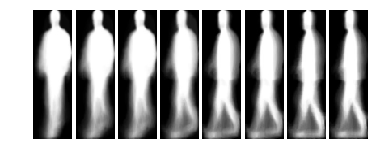

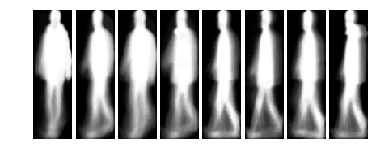

per con ang [2 2 2 2 2 2 2 2] 
 [3 3 3 3 3 3 3 3] 
 [1 2 2 3 4 4 5 5]
per con ang [60  2 16 34  2 19  2  0] 
 [3 3 3 3 3 3 3 3] 
 [1 3 2 3 5 4 6 5]


In [8]:
ran = range(400,408)
imshow_grid(pairs1[ran].squeeze(axis = -1))
imshow_grid(pairs2[ran].squeeze(axis = -1))
print("per con ang",pairs_label[ran,0,0],'\n',pairs_label[ran,0,1],'\n',pairs_label[ran,0,2])
print("per con ang",pairs_label[ran,1,0],'\n',pairs_label[ran,1,1],'\n',pairs_label[ran,1,2])

## Model

In [9]:
batch_size = 32

class MNISTModel(object):
    """Simple MNIST domain adaptation model."""
    def __init__(self):
        self._build_model()
        
    def network(self,x, train_batch):
        W_conv0 = weight_variable([5, 5, 1, 32], name ='W0')
        b_conv0 = bias_variable([32], name = 'b0')
        h_conv0 = tf.nn.relu(batch_norm_layer((conv2d(x, W_conv0) + b_conv0), train_phase=train_batch,name ='bn0'))
        h_pool0 = max_pool_2x2(h_conv0)

        W_conv1 = weight_variable([5, 5, 32, 48], name ='W1')
        b_conv1 = bias_variable([48], name = 'b1')
        h_conv1 = tf.nn.relu(batch_norm_layer((conv2d(h_pool0, W_conv1) + b_conv1), train_phase=train_batch,name ='bn1'))
        h_pool1 = max_pool_2x2(h_conv1)

        W_conv2 = weight_variable([5, 5, 48, 64], name ='W2')
        b_conv2 = bias_variable([64], name = 'b2')
        h_conv2 = tf.nn.relu(batch_norm_layer((conv2d(h_pool1, W_conv2) + b_conv2), train_phase=train_batch,name ='bn2'))
        h_pool2 = max_pool_2x2(h_conv2)

        h_pool2_flat = tf.reshape(h_pool2, [-1, 20*6*64])
        W_fc1 = weight_variable([20*6*64, 512], name ='W3')
        b_fc1 = bias_variable([512], name = 'b3')
        h_fc1 = tf.nn.relu(batch_norm_layer((tf.matmul(h_pool2_flat, W_fc1) + b_fc1),train_phase=train_batch,name ='bn3'))
#             h_fc1_drop = tf.nn.dropout(h_fc1, self.keep_prob)

        # The domain-invariant feature
        self.feature = tf.reshape(h_fc1, [-1, 512])
        
        return self.feature

    
    def _build_model(self):
        self.X1 = tf.placeholder(tf.float32, [None, 160 ,48, 1])
        self.X2 = tf.placeholder(tf.float32, [None, 160 ,48, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        self.domain = tf.placeholder(tf.float32, [None, 3])
        self.l = tf.placeholder(tf.float32, [])
        self.useDomain = tf.placeholder(tf.bool, [])
        self.class_weight = tf.placeholder(tf.float32, [None, 3])
        self.train_batch = tf.placeholder(tf.bool, [])
#         self.keep_prob = tf.placeholder(tf.float32, [])
        
#         X1_input = (tf.cast(self.X1, tf.float32) - pixel_mean) / 255  #bug.
#         X2_input = (tf.cast(self.X2, tf.float32) - pixel_mean) / 255. #bug
#         X1_input = (tf.cast(self.X1, tf.float32)#bug.
#         X2_input = (tf.cast(self.X2, tf.float32)  #bug
        
        # CNN model for feature extraction
        with tf.variable_scope('feature_extraction') as scope:
            self.o1 = self.network(self.X1,self.train_batch)
            scope.reuse_variables()
            self.o2 = self.network(self.X2,self.train_batch)
            
 
        # MLP for class prediction
        with tf.variable_scope('contrastive-loss'):
            margin = 5
            self.d = tf.sqrt(tf.reduce_sum(tf.pow(self.o1-self.o2, 2), 1, keep_dims=True))
            tmp= self.y * tf.square(self.d)    
            tmp2 = (1 - self.y) * tf.square(tf.maximum((margin - self.d),0))
#             self.c_loss = tf.reduce_mean(tmp + tmp2) /2
            self.c_loss = (tf.reduce_mean(tmp + tmp2) /2)
            
#             c_W_fc0 = weight_variable([1, 1], name = 'c_w0')
#             c_b_fc0 = bias_variable([1], name = 'c_b0')
#             c_logits = tf.matmul(self.loss, c_W_fc0) + c_b_fc0
            
#             self.c_pred = tf.nn.sigmoid(c_logits)  #機率
#             self.c_pred_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=c_logits, labels=self.y)
#            
        # Small MLP for domain prediction with adversarial loss
        with tf.variable_scope('domain_predictor'):
            # Flip the gradient when backpropagating through this operation
            feat = flip_gradient(self.o1, self.l)
            
            d_W_fc0 = weight_variable([512, 256], name = 'd_w0')
            d_b_fc0 = bias_variable([256], name = 'd_b0')
#             d_h_fc0 = tf.nn.relu(tf.matmul(feat, d_W_fc0) + d_b_fc0)
            d_h_fc0 = tf.nn.relu(batch_norm_layer((tf.matmul(feat, d_W_fc0) + d_b_fc0),train_phase=self.train_batch ,name ='bn0'))
                           
            d_W_fc1 = weight_variable([256, 64], name = 'd_w1')
            d_b_fc1 = bias_variable([64], name = 'd_b1')
#             d_h_fc1 = tf.nn.relu(tf.matmul(d_h_fc0, d_W_fc1) + d_b_fc1)
            d_h_fc1 = tf.nn.relu(batch_norm_layer((tf.matmul(d_h_fc0, d_W_fc1) + d_b_fc1),train_phase=self.train_batch ,name ='bn1'))
                           
            d_W_fc2 = weight_variable([64, 3], name = 'd_w2')
            d_b_fc2 = bias_variable([3], name = 'd_b2')
            d_logits = batch_norm_layer((tf.matmul(d_h_fc1, d_W_fc2) + d_b_fc2),train_phase=self.train_batch ,name ='bn2')
            
            
           
            self.domain_pred = tf.nn.softmax(d_logits)
#             self.domain_loss = tf.nn.softmax_cross_entropy_with_logits(logits=d_logits, labels=self.domain)
            self.domain_loss = tf.losses.softmax_cross_entropy(onehot_labels=self.domain, logits=d_logits, weights=2.5)
#             self.domain_loss = 2.5*(self.domain_loss)

#             class_weights = tf.multiply(self.domain, self.class_weights)
#             self.domain_loss = tf.losses.softmax_cross_entropy(onehot_labels=class_weights,logits=d_logits)
            

In [10]:
vs = tf.trainable_variables()
for v in vs:
    print (v)

In [11]:
# Build the model graph
graph = tf.get_default_graph()
with graph.as_default():
    model = MNISTModel()
    
    learning_rate = tf.placeholder(tf.float32, [])
    
    feature = model.o1
    distance = model.d
    domain_prediction = model.domain_pred
    c_loss = tf.reduce_mean(model.c_loss)
    domain_loss = tf.reduce_mean(model.domain_loss)
    total_loss = c_loss + domain_loss

    train_op = tf.cond(model.useDomain, 
                lambda: tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(total_loss),
                lambda: tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(c_loss))
#         dann_train_op = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(total_loss)
#         regular_train_op = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(c_loss)
    
    
# Evaluation
#     correct_label_pred = tf.equal(tf.round(model.c_pred), model.y)
#     label_acc = tf.reduce_mean(tf.cast(correct_label_pred, tf.float32))
    correct_domain_pred = tf.equal(tf.argmax(model.domain, 1), tf.argmax(model.domain_pred, 1))
    domain_acc = tf.reduce_mean(tf.cast(correct_domain_pred, tf.float32))


params_shape [Dimension(32)]
axises [0, 1, 2]
params_shape [Dimension(48)]
axises [0, 1, 2]
params_shape [Dimension(64)]
axises [0, 1, 2]
params_shape [Dimension(512)]
axises [0]
params_shape [Dimension(32)]
axises [0, 1, 2]
params_shape [Dimension(48)]
axises [0, 1, 2]
params_shape [Dimension(64)]
axises [0, 1, 2]
params_shape [Dimension(512)]
axises [0]
Instructions for updating:
keep_dims is deprecated, use keepdims instead
params_shape [Dimension(256)]
axises [0]
params_shape [Dimension(64)]
axises [0]
params_shape [Dimension(3)]
axises [0]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [12]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(domain_labels[:,1]),
                                                 domain_labels[:,1])
# domain 0/1: bg [1,0] , 4/5:nm [0,1]
print(class_weights)
# y_integers = np.argmax(domain_labels_o, axis=1)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
# d_class_weights = dict(enumerate(class_weights))

domain_class_weight = np.multiply(domain_labels_o, class_weights)
print(domain_labels_o)
print(domain_class_weight)

# print(class_weights)
# print(np.unique(domain_labels_o))
# print(domain_labels_o)
# class_weight=[]

# def foo(somelist):
#     for x in somelist:
#         class_weight.append(class_weights[int(x)] )
#     return class_weight
# class_weight = foo(domain_labels_o[:,0])
# class_weight = np.array(class_weight)
# print(len(class_weight), len(domain_labels_o[:,0]))

[1.49099485 1.44754371 0.61032122]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.49099485 0.         0.        ]
 [1.49099485 0.         0.        ]
 [1.49099485 0.         0.        ]
 ...
 [0.         0.         0.61032122]
 [0.         0.         0.61032122]
 [0.         0.         0.61032122]]


In [13]:
def return_modelpath(model_name='ex'):
    dirpath = 'model/'+ model_name
    if not os.path.isdir(dirpath):
            os.mkdir(dirpath)
    filepath = dirpath + '/'+ model_name  +'.ckpt'
    return dirpath

# train

In [14]:
def train_and_evaluate(training_mode, graph, model, epoches=10, verbose=True, use_model=True, model_name='50epoch_False'):#num_steps=50
    """Helper to run the model with different training modes."""

    with tf.Session(graph=graph) as sess:
        saver = tf.train.Saver()
        tf.global_variables_initializer().run()
        
        # Batch generators
#         gen_batch = batch_generator2(
#             [pairs1, pairs2, same_pair, domain_labels_o], batch_size )
        gen_batch = batch_generator2(
            [pairs1, pairs2, same_pair, domain_class_weight], batch_size )

        history = {'train loss':[], 'val loss':[], 'train dloss':[], 'val dloss':[], 
                   'train closs':[], 'val closs':[], 'train dacc':[], 'val dacc':[]}
        every_batch = []
        num_steps = int(math.ceil(len(pairs1)/batch_size))

        # Training loop
        for i in range(epoches): 
            for j in range(num_steps):
                # Adaptation param and learning rate schedule as described in the paper
                p = float(i) / num_steps
                l = 2. / (1. + np.exp(-10. * p)) - 1
                lr = 0.001 / (1. + 10 * p)**0.75
    #             keep_ratio = 0.7

                # Training step
                if training_mode == 'dann':

                    b_pairs1, b_pairs2, b_same_pair, b_domain_labels_o = next(gen_batch)

                    _, batch_loss, dloss, closs, dacc, dpred, = sess.run(
                        [train_op, total_loss, domain_loss, c_loss, domain_acc, domain_prediction],
                        feed_dict={model.X1: b_pairs1 ,model.X2: b_pairs2, 
                                   model.y: b_same_pair, model.domain: b_domain_labels_o,
                                   model.train_batch: True,
                                   model.useDomain: use_model, model.l: l, learning_rate: lr})
                    every_batch.append([batch_loss, dloss, closs, dacc])
                    
                    if verbose and (j+1) % 20 == 0:
                        print('j: {}/{} loss: {} d_loss: {} c_loss: {} d_acc: {}'.format(
                                 j+1,num_steps,batch_loss, dloss, closs ,dacc))
                    if ((i+1) %10 ==0) & (j ==0):
                        print('dpred: {}'.format( dpred[:16] ))
#                         print('j: {} loss: {}  d_acc: {}  d_loss: {} c_loss: {}   l: {}  lr: {}'.format(
#                                  j,batch_loss, d_acc, dloss, closs, l, lr))
            epoch_avg = np.average(np.array(every_batch), axis=0)
            history['train loss'].append(epoch_avg[0])
            history['train dloss'].append(epoch_avg[1])
            history['train closs'].append(epoch_avg[2])
            history['train dacc'].append(epoch_avg[3])
            print('epoch: {} tr_loss: {} tr_dloss: {} tr_closs: {} tr_dacc: {}'.format(
                                i+1,epoch_avg[0], epoch_avg[1], epoch_avg[2],epoch_avg[3]))
            
            val_loss, val_dloss, val_closs, val_dacc = sess.run( 
                                [total_loss, domain_loss, c_loss, domain_acc],
                                feed_dict={ model.X1: pairs1_val ,
                                        model.X2: pairs2_val, 
                                        model.y: same_pair_val,
                                        model.train_batch: False,
                                        model.domain: domain_labels_o_val, 
                                        model.l: 1.0})
            history['val loss'].append(val_loss)
            history['val dloss'].append(val_dloss)
            history['val closs'].append(val_closs)
            history['val dacc'].append(val_dacc)
            if verbose :
                print('epoch: {} val_loss: {} val_dloss: {} val_closs: {} val_dacc: {} \n'.format(
                                i+1,val_loss, val_dloss, val_closs,val_dacc))
        
        saver.save(sess, return_modelpath(model_name) + '/' + model_name + 'ckpt')
        print('evaluate phase')                                 
        end_val_loss, end_val_dloss, end_val_closs, end_val_dacc = sess.run(
                                [total_loss, domain_loss, c_loss, domain_acc],
                                feed_dict={ model.X1: pairs1_val ,
                                        model.X2: pairs2_val, 
                                        model.y: same_pair_val,
                                        model.train_batch: False,
                                        model.domain: domain_labels_o_val, 
                                        model.l: 1.0})
        print('end_val_loss: {} end_val_dloss: {} end_val_closs: {} end_val_dacc: {}'.format(
                                end_val_loss, end_val_dloss, end_val_closs, end_val_dacc ))
        
        test_batch_size = int(math.ceil(len(X_test)/5 ))
        print(test_batch_size)
        num_steps = 5
        X_test_emd =[]
        X_test_emd = np.array(X_test_emd).reshape(0,512)
        gentest_batch = batch_generator2([X_test], test_batch_size, shuffle = False )
        for z in range(num_steps):
            b_X_test = next(gentest_batch)
            b_X_test_emd = sess.run(feature, feed_dict={model.X1: b_X_test[0], model.train_batch: False}) 
            X_test_emd = np.vstack([X_test_emd, b_X_test_emd])
        print(X_test_emd[0])
        
        
    return X_test_emd, history 



print('\nDomain adaptation training')
use_model = True
t = time.strftime("%m%d_%H%M", time.localtime())
model_name = '40epoch_True_weight2.5'+ t
X_emd_test, his = train_and_evaluate('dann', graph, model,epoches = 40 ,use_model= use_model,model_name=model_name)
print( X_emd_test.shape )


Domain adaptation training
j: 20/326 loss: 16.098403930664062 d_loss: 3.039142608642578 c_loss: 13.059261322021484 d_acc: 0.4375
j: 40/326 loss: 10.551249504089355 d_loss: 2.519949197769165 c_loss: 8.03130054473877 d_acc: 0.46875
j: 60/326 loss: 17.80015754699707 d_loss: 1.8330063819885254 c_loss: 15.967151641845703 d_acc: 0.78125
j: 80/326 loss: 11.811103820800781 d_loss: 1.9315906763076782 c_loss: 9.879512786865234 d_acc: 0.5625
j: 100/326 loss: 7.469220161437988 d_loss: 1.5610558986663818 c_loss: 5.9081645011901855 d_acc: 0.75
j: 120/326 loss: 23.02630043029785 d_loss: 1.8964290618896484 c_loss: 21.129871368408203 d_acc: 0.6875
j: 140/326 loss: 5.914813995361328 d_loss: 1.5174081325531006 c_loss: 4.397405624389648 d_acc: 0.65625
j: 160/326 loss: 8.332639694213867 d_loss: 2.1361749172210693 c_loss: 6.196465015411377 d_acc: 0.65625
j: 180/326 loss: 4.402955055236816 d_loss: 1.8588979244232178 c_loss: 2.5440568923950195 d_acc: 0.75
j: 200/326 loss: 7.589839935302734 d_loss: 2.11449599

j: 160/326 loss: 3.877183198928833 d_loss: 2.3104753494262695 c_loss: 1.5667078495025635 d_acc: 0.4375
j: 180/326 loss: 3.588280200958252 d_loss: 2.7871603965759277 c_loss: 0.8011197447776794 d_acc: 0.34375
j: 200/326 loss: 4.113650798797607 d_loss: 2.656585693359375 c_loss: 1.457065224647522 d_acc: 0.5
j: 220/326 loss: 4.79266357421875 d_loss: 3.1001386642456055 c_loss: 1.6925249099731445 d_acc: 0.28125
j: 240/326 loss: 3.3447203636169434 d_loss: 2.1804771423339844 c_loss: 1.1642433404922485 d_acc: 0.59375
j: 260/326 loss: 4.5834550857543945 d_loss: 2.586780309677124 c_loss: 1.9966747760772705 d_acc: 0.46875
j: 280/326 loss: 3.7242679595947266 d_loss: 2.4475889205932617 c_loss: 1.2766790390014648 d_acc: 0.40625
j: 300/326 loss: 4.044849395751953 d_loss: 2.2770705223083496 c_loss: 1.7677791118621826 d_acc: 0.4375
j: 320/326 loss: 3.499035120010376 d_loss: 2.394305467605591 c_loss: 1.1047296524047852 d_acc: 0.5
epoch: 5 tr_loss: 5.487342834472656 tr_dloss: 2.3889000415802 tr_closs: 3.09

j: 300/326 loss: 3.5737199783325195 d_loss: 2.5783653259277344 c_loss: 0.9953547120094299 d_acc: 0.21875
j: 320/326 loss: 3.814635753631592 d_loss: 2.7946126461029053 c_loss: 1.0200231075286865 d_acc: 0.34375
epoch: 9 tr_loss: 4.864530086517334 tr_dloss: 2.496582269668579 tr_closs: 2.3679494857788086 tr_dacc: 0.4738704264163971
epoch: 9 val_loss: 3.6160192489624023 val_dloss: 2.57973051071167 val_closs: 1.0362887382507324 val_dacc: 0.4564279615879059 

dpred: [[0.5502512  0.22605367 0.22369514]
 [0.19718333 0.50882965 0.293987  ]
 [0.2715118  0.2562855  0.47220275]
 [0.24490863 0.502408   0.25268337]
 [0.25702897 0.4314075  0.3115635 ]
 [0.28625098 0.20260008 0.5111489 ]
 [0.28536317 0.43857193 0.2760649 ]
 [0.2780752  0.39093083 0.33099398]
 [0.30014727 0.30849016 0.39136258]
 [0.30363157 0.36565676 0.33071163]
 [0.30770087 0.29519635 0.39710274]
 [0.48940545 0.1797449  0.33084965]
 [0.385278   0.17289394 0.44182807]
 [0.44134945 0.22675888 0.33189166]
 [0.2645057  0.4434628  0.292031

j: 320/326 loss: 4.2681074142456055 d_loss: 2.830486297607422 c_loss: 1.4376211166381836 d_acc: 0.375
epoch: 13 tr_loss: 4.561228275299072 tr_dloss: 2.546880006790161 tr_closs: 2.014347553253174 tr_dacc: 0.4523008465766907
epoch: 13 val_loss: 3.697486400604248 val_dloss: 2.642881155014038 val_closs: 1.0546051263809204 val_dacc: 0.4288179576396942 

j: 20/326 loss: 4.871097564697266 d_loss: 3.226381540298462 c_loss: 1.6447160243988037 d_acc: 0.40625
j: 40/326 loss: 3.6691653728485107 d_loss: 2.4688820838928223 c_loss: 1.2002832889556885 d_acc: 0.46875
j: 60/326 loss: 4.2109575271606445 d_loss: 3.03299617767334 c_loss: 1.1779613494873047 d_acc: 0.3125
j: 80/326 loss: 3.5714967250823975 d_loss: 2.299041986465454 c_loss: 1.2724547386169434 d_acc: 0.4375
j: 100/326 loss: 4.785032272338867 d_loss: 3.148029088973999 c_loss: 1.637002944946289 d_acc: 0.3125
j: 120/326 loss: 3.8037357330322266 d_loss: 2.7178971767425537 c_loss: 1.0858384370803833 d_acc: 0.40625
j: 140/326 loss: 3.847178459167480

j: 80/326 loss: 3.615230083465576 d_loss: 2.702587842941284 c_loss: 0.9126421809196472 d_acc: 0.375
j: 100/326 loss: 3.894928455352783 d_loss: 2.629716157913208 c_loss: 1.2652121782302856 d_acc: 0.46875
j: 120/326 loss: 3.723085880279541 d_loss: 2.9642372131347656 c_loss: 0.7588487863540649 d_acc: 0.4375
j: 140/326 loss: 3.7347867488861084 d_loss: 2.3965864181518555 c_loss: 1.338200330734253 d_acc: 0.21875
j: 160/326 loss: 3.8264291286468506 d_loss: 3.0050880908966064 c_loss: 0.8213410377502441 d_acc: 0.375
j: 180/326 loss: 3.6030564308166504 d_loss: 2.6289119720458984 c_loss: 0.974144458770752 d_acc: 0.5625
j: 200/326 loss: 3.904744863510132 d_loss: 2.867443084716797 c_loss: 1.037301778793335 d_acc: 0.4375
j: 220/326 loss: 4.555692672729492 d_loss: 2.8809070587158203 c_loss: 1.6747853755950928 d_acc: 0.25
j: 240/326 loss: 4.0670318603515625 d_loss: 2.823695182800293 c_loss: 1.24333655834198 d_acc: 0.3125
j: 260/326 loss: 3.6552534103393555 d_loss: 2.594761371612549 c_loss: 1.060492157

j: 100/326 loss: 3.900028944015503 d_loss: 2.721219062805176 c_loss: 1.1788098812103271 d_acc: 0.375
j: 120/326 loss: 3.5096733570098877 d_loss: 2.764756441116333 c_loss: 0.7449169754981995 d_acc: 0.375
j: 140/326 loss: 3.055875062942505 d_loss: 2.422729253768921 c_loss: 0.6331458687782288 d_acc: 0.53125
j: 160/326 loss: 3.620943546295166 d_loss: 2.5405054092407227 c_loss: 1.080438256263733 d_acc: 0.375
j: 180/326 loss: 3.3446412086486816 d_loss: 2.6198458671569824 c_loss: 0.7247953414916992 d_acc: 0.53125
j: 200/326 loss: 3.869985342025757 d_loss: 2.8792200088500977 c_loss: 0.9907653331756592 d_acc: 0.375
j: 220/326 loss: 4.677275657653809 d_loss: 2.779249668121338 c_loss: 1.8980257511138916 d_acc: 0.28125
j: 240/326 loss: 3.7377054691314697 d_loss: 2.7394158840179443 c_loss: 0.9982895851135254 d_acc: 0.25
j: 260/326 loss: 4.096634387969971 d_loss: 2.6454110145568848 c_loss: 1.4512232542037964 d_acc: 0.46875
j: 280/326 loss: 3.612884998321533 d_loss: 2.7292773723602295 c_loss: 0.88360

j: 240/326 loss: 3.729194164276123 d_loss: 2.9835026264190674 c_loss: 0.7456916570663452 d_acc: 0.46875
j: 260/326 loss: 3.5235464572906494 d_loss: 2.6566720008850098 c_loss: 0.8668744564056396 d_acc: 0.4375
j: 280/326 loss: 3.6485092639923096 d_loss: 2.791283130645752 c_loss: 0.8572261929512024 d_acc: 0.34375
j: 300/326 loss: 3.6500449180603027 d_loss: 2.7617340087890625 c_loss: 0.8883110284805298 d_acc: 0.40625
j: 320/326 loss: 3.6942648887634277 d_loss: 2.629520893096924 c_loss: 1.064743995666504 d_acc: 0.40625
epoch: 26 tr_loss: 4.138914585113525 tr_dloss: 2.6158981323242188 tr_closs: 1.523028016090393 tr_dacc: 0.42018333077430725
epoch: 26 val_loss: 3.4092941284179688 val_dloss: 2.5702242851257324 val_closs: 0.8390698432922363 val_dacc: 0.46419328451156616 

j: 20/326 loss: 3.6761550903320312 d_loss: 2.570911407470703 c_loss: 1.1052436828613281 d_acc: 0.53125
j: 40/326 loss: 3.3107187747955322 d_loss: 2.596581220626831 c_loss: 0.714137613773346 d_acc: 0.3125
j: 60/326 loss: 3.7250

j: 260/326 loss: 4.194321155548096 d_loss: 2.8759450912475586 c_loss: 1.318376064300537 d_acc: 0.53125
j: 280/326 loss: 3.3952221870422363 d_loss: 2.4364306926727295 c_loss: 0.9587913751602173 d_acc: 0.34375
j: 300/326 loss: 3.456146478652954 d_loss: 2.5157675743103027 c_loss: 0.9403789043426514 d_acc: 0.4375
j: 320/326 loss: 3.4982967376708984 d_loss: 2.8132996559143066 c_loss: 0.6849972009658813 d_acc: 0.4375
epoch: 30 tr_loss: 4.070918560028076 tr_dloss: 2.620004177093506 tr_closs: 1.4509190320968628 tr_dacc: 0.42163774371147156
epoch: 30 val_loss: 3.5693540573120117 val_dloss: 2.7648651599884033 val_closs: 0.804489016532898 val_dacc: 0.3727351129055023 

j: 20/326 loss: 3.114130973815918 d_loss: 2.561218500137329 c_loss: 0.5529124736785889 d_acc: 0.375
j: 40/326 loss: 3.9589929580688477 d_loss: 2.8101420402526855 c_loss: 1.148850917816162 d_acc: 0.5
j: 60/326 loss: 3.4849166870117188 d_loss: 2.3579273223876953 c_loss: 1.1269892454147339 d_acc: 0.34375
j: 80/326 loss: 4.149021148681

j: 20/326 loss: 3.781813144683838 d_loss: 2.893118143081665 c_loss: 0.8886948823928833 d_acc: 0.375
j: 40/326 loss: 4.054520606994629 d_loss: 2.8186187744140625 c_loss: 1.2359020709991455 d_acc: 0.3125
j: 60/326 loss: 3.677311897277832 d_loss: 2.9999470710754395 c_loss: 0.6773647665977478 d_acc: 0.3125
j: 80/326 loss: 3.657442569732666 d_loss: 3.0055007934570312 c_loss: 0.6519416570663452 d_acc: 0.28125
j: 100/326 loss: 3.246802806854248 d_loss: 2.3430325984954834 c_loss: 0.9037702083587646 d_acc: 0.5
j: 120/326 loss: 3.203589677810669 d_loss: 2.5024893283843994 c_loss: 0.7011004090309143 d_acc: 0.40625
j: 140/326 loss: 3.824314832687378 d_loss: 2.9100124835968018 c_loss: 0.9143023490905762 d_acc: 0.53125
j: 160/326 loss: 3.707468271255493 d_loss: 2.589569568634033 c_loss: 1.11789870262146 d_acc: 0.40625
j: 180/326 loss: 3.7737884521484375 d_loss: 2.749255657196045 c_loss: 1.024532675743103 d_acc: 0.46875
j: 200/326 loss: 3.627079725265503 d_loss: 2.93868350982666 c_loss: 0.68839621543

j: 160/326 loss: 3.818452835083008 d_loss: 2.8616414070129395 c_loss: 0.9568115472793579 d_acc: 0.46875
j: 180/326 loss: 3.7681832313537598 d_loss: 2.800828218460083 c_loss: 0.9673550128936768 d_acc: 0.4375
j: 200/326 loss: 3.6326050758361816 d_loss: 2.3142623901367188 c_loss: 1.3183425664901733 d_acc: 0.4375
j: 220/326 loss: 3.876661777496338 d_loss: 2.999246597290039 c_loss: 0.8774150609970093 d_acc: 0.375
j: 240/326 loss: 3.9168643951416016 d_loss: 2.8133246898651123 c_loss: 1.1035395860671997 d_acc: 0.46875
j: 260/326 loss: 3.166970729827881 d_loss: 2.674928903579712 c_loss: 0.4920419454574585 d_acc: 0.34375
j: 280/326 loss: 3.9705586433410645 d_loss: 2.777411460876465 c_loss: 1.1931471824645996 d_acc: 0.625
j: 300/326 loss: 3.410247325897217 d_loss: 2.5233912467956543 c_loss: 0.8868560791015625 d_acc: 0.4375
j: 320/326 loss: 4.3656086921691895 d_loss: 2.610625743865967 c_loss: 1.754982829093933 d_acc: 0.3125
epoch: 39 tr_loss: 3.9610612392425537 tr_dloss: 2.631037473678589 tr_clos

# load model

In [14]:
def load_model(model_name):
    with tf.Session(graph=graph) as sess:
        saver = tf.train.Saver()
        tf.global_variables_initializer().run()
        
        saver.restore(sess, return_modelpath(model_name) + '/' + model_name + 'ckpt')
        print('already load model')
        test_batch_size = int(math.ceil(len(X_test)/5 ))
        print('X_test',len(X_test))
        print('test_batch_size',test_batch_size)
        num_steps = 5
        X_test_emd =[]
        X_test_emd = np.array(X_test_emd).reshape(0,512)
        gentest_batch = batch_generator2([X_test], test_batch_size, shuffle = False )
        for z in range(num_steps):
            b_X_test = next(gentest_batch)
            b_X_test_emd = sess.run(feature, feed_dict={model.X1: b_X_test[0], model.train_batch: False}) 
            X_test_emd = np.vstack([X_test_emd, b_X_test_emd])
        print(X_test_emd[0])
    return  X_test_emd

model_name = '40epoch_True_weight50118_1731'
# X_emd_test = load_model(model_name)
X_emd_test = load_model(model_name )

INFO:tensorflow:Restoring parameters from model/40epoch_True_weight50118_1731/40epoch_True_weight50118_1731ckpt
already load model
X_test 6754
test_batch_size 1351
[0.00000000e+00 1.02087140e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.21057808e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26438999e-01
 6.56960607e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.32503629e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.72068924e-01
 7.48024285e-01 0.00000000e+00 1.17544651e-01 7.93821812e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.66702628e-01
 1.88046455e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.36298299e-01 1.32026970e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.11228430e-01 0.00000000e+00 0.00000000e+00
 4.95250106e-01 1.50404811e-01 8.44005942e-02 3.22238624e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+

In [ ]:
def draw_loss(history,model_name,w = 'closs'):
    plt.plot(history['train '+w])
    plt.plot(history['val '+w])
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(['train '+w,'val '+w])
    plt.title(w)
    plt.savefig(return_modelpath(model_name)+'/'+w+'.jpg')
    plt.show()
    plt.close()   
    
draw_loss(his,model_name,w = 'loss')
draw_loss(his,model_name,w = 'closs')
draw_loss(his,model_name,w = 'dloss')
draw_loss(his,model_name,w = 'dacc')

# KNN

In [15]:
model_name

'40epoch_True_weight50118_1731'

In [16]:
def pgset(X_test, y_test, probe_condition):
    print("X_test",len(X_test))
    bool_nm = ((y_test[:,1]>3)*(y_test[:,1]<8)) # nm1234
    X_gallery = X_test[np.where(bool_nm)[0]]
    y_gallery = y_test[np.where(bool_nm)[0]]
    unique, counts = np.unique(y_gallery[:,0], return_counts=True)
    print("persons",len(unique.tolist()))
    print("gallery = ",dict(zip(unique, counts)))
    if( probe_condition =='cl'):
        print("in CL")
        bool_CL = (y_test[:,1]>=2)*(y_test[:,1]<=3) # CL0102
        X_probe = X_test[np.where(bool_CL)[0]]
        y_probe = y_test[np.where(bool_CL)[0]]
    elif( probe_condition =='nm'):
        print('in NM')
        bool_nm2 = (y_test[:,1]>7)*(y_test[:,1]<10) # nm05~06
        X_probe = X_test[np.where(bool_nm2)[0]]
        y_probe = y_test[np.where(bool_nm2)[0]]
    elif(probe_condition =='bg'):
        print('in bg')
        bool_bg = (y_test[:,1]>=0)*(y_test[:,1]<2) # bg0102
        X_probe = X_test[np.where(bool_bg)[0]]
        y_probe = y_test[np.where(bool_bg)[0]]
    elif(probe_condition =='all'):
        print('in ALL')
        X_probe = X_test[np.where(~bool_nm)[0]]
        y_probe = y_test[np.where(~bool_nm)[0]]
    elif(probe_condition =='nm&bg'):
        print('in two')
        bool_ = (y_test[:,1]>7)*(y_test[:,1]<10)|(y_test[:,1]>=0)*(y_test[:,1]<2)
        X_probe = X_test[np.where(bool_)[0]]
        y_probe = y_test[np.where(bool_)[0]]
    elif(probe_condition =='nm&cl'):
        print('in two')
        bool_ = (y_test[:,1]>7)*(y_test[:,1]<10)|(y_test[:,1]>=2)*(y_test[:,1]<4)
        X_probe = X_test[np.where(bool_)[0]]
        y_probe = y_test[np.where(bool_)[0]]
    unique, counts = np.unique(y_probe[:,0], return_counts=True)
    print("persons",len(unique.tolist()))
    print("probe= ",dict(zip(unique, counts)))
    return X_gallery, y_gallery, X_probe, y_probe



In [17]:
def knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe_condition,model_name):
            
    gait_X_train = X_gallery
    gait_X_test = X_probe
    print('shape_gallery ',gait_X_train.shape)
    print('shape_probe ',gait_X_test.shape)
    gait_Y_train = y_gallery[:,0].reshape(-1,1)
    gait_Y_test = y_probe[:,0].reshape(-1,1)
    print(gait_Y_train.shape)

    k_list = list(range(2,10,1))
    s_best = 0
    k_best = 0
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs= 6)
        knn.fit(gait_X_train, gait_Y_train)
        s = knn.score(gait_X_test, gait_Y_test)
        print("k=",k,"score=",s)
        if(s_best < s):
            s_best = s
            k_best = k
    print("k_best",k_best) 

    knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs = 6) #weights ='distance', algorithm='ball_tree'
    knn_best.fit(gait_X_train, gait_Y_train)
    gait_Y_test_pred = knn_best.predict(gait_X_test).reshape(-1,1)
    cm1 = confusion_matrix(gait_Y_test, gait_Y_test_pred) 
    s_te = knn_best.score(gait_X_test, gait_Y_test)
    print('cm\n',cm1)
    print('score_test',s_te)
    
    with open(return_modelpath(model_name) + '/log.txt' ,'a') as fh:
        fh.write(probe_condition+'='+str(s_te)+'\n')
    return s_te


probe_list = ['nm','bg','cl']
prob_acc = []
for probe in probe_list:
    X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
    se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe,model_name)
    prob_acc.append(se_knn)

X_test 6754
persons 62
gallery =  {62: 44, 63: 44, 64: 44, 65: 44, 66: 33, 67: 33, 68: 44, 69: 44, 70: 44, 71: 44, 72: 44, 73: 44, 74: 44, 75: 44, 76: 44, 77: 44, 78: 44, 79: 44, 80: 44, 81: 44, 82: 44, 83: 44, 84: 44, 85: 44, 86: 44, 87: 35, 88: 44, 89: 44, 90: 44, 91: 44, 92: 44, 93: 44, 94: 44, 95: 44, 96: 44, 97: 44, 98: 44, 99: 44, 100: 44, 101: 44, 102: 44, 103: 44, 104: 44, 105: 44, 106: 44, 107: 44, 108: 40, 109: 44, 110: 44, 111: 44, 112: 44, 113: 44, 114: 44, 115: 44, 116: 44, 117: 44, 118: 44, 119: 44, 120: 44, 121: 44, 122: 44, 123: 44}
in NM
persons 61
probe=  {62: 22, 63: 22, 64: 22, 65: 22, 67: 15, 68: 22, 69: 22, 70: 22, 71: 22, 72: 22, 73: 22, 74: 22, 75: 22, 76: 22, 77: 22, 78: 22, 79: 22, 80: 22, 81: 22, 82: 22, 83: 22, 84: 22, 85: 22, 86: 22, 87: 22, 88: 22, 89: 22, 90: 22, 91: 22, 92: 22, 93: 22, 94: 22, 95: 22, 96: 22, 97: 22, 98: 22, 99: 22, 100: 22, 101: 22, 102: 22, 103: 22, 104: 22, 105: 22, 106: 22, 107: 22, 108: 22, 109: 22, 110: 22, 111: 22, 112: 22, 113: 2

/home/deep3072/anaconda2/envs/py36_ting_cv/lib/python3.6/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k= 2 score= 0.9445692883895132
k= 3 score= 0.9438202247191011
k= 4 score= 0.9430711610486892
k= 5 score= 0.9348314606741573
k= 6 score= 0.9265917602996254
k= 7 score= 0.9258426966292135
k= 8 score= 0.9198501872659176
k= 9 score= 0.903370786516854
k_best 2


/home/deep3072/anaconda2/envs/py36_ting_cv/lib/python3.6/site-packages/ipykernel/__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


cm
 [[21  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 22]]
score_test 0.9445692883895132
X_test 6754
persons 62
gallery =  {62: 44, 63: 44, 64: 44, 65: 44, 66: 33, 67: 33, 68: 44, 69: 44, 70: 44, 71: 44, 72: 44, 73: 44, 74: 44, 75: 44, 76: 44, 77: 44, 78: 44, 79: 44, 80: 44, 81: 44, 82: 44, 83: 44, 84: 44, 85: 44, 86: 44, 87: 35, 88: 44, 89: 44, 90: 44, 91: 44, 92: 44, 93: 44, 94: 44, 95: 44, 96: 44, 97: 44, 98: 44, 99: 44, 100: 44, 101: 44, 102: 44, 103: 44, 104: 44, 105: 44, 106: 44, 107: 44, 108: 40, 109: 44, 110: 44, 111: 44, 112: 44, 113: 44, 114: 44, 115: 44, 116: 44, 117: 44, 118: 44, 119: 44, 120: 44, 121: 44, 122: 44, 123: 44}
in bg
persons 62
probe=  {62: 22, 63: 22, 64: 22, 65: 22, 66: 22, 67: 22, 68: 22, 69: 22, 70: 22, 71: 22, 72: 22, 73: 22, 74: 22, 75: 22, 76: 22, 77: 22, 78: 20, 79: 22, 80: 22, 81: 22, 82: 22, 83: 22, 84: 22, 85: 22, 86: 22, 87: 22, 88: 22, 89: 22, 90: 2

### plot knn only probe per angle

In [ ]:
#(圖二) 每一個 probe 對上 gallery 所有角度但不包括該 probe 角度
def acc_matrix1(X_gallery , X_probe, y_gallery, y_probe, probe_condition):  
    result = np.zeros((11, ))
#     for i in range(0,11):
#     gallery_index = np.where((y_gallery[:,2]==i))[0]
    print('len(gallery)',len(X_gallery))
    print('len(probe)',len(X_probe))
    for j in range(0,11):
        print('\n','i,j',i,j)
        gallery_index = np.where((y_gallery[:,2]!=j))[0]
        print('len(gallery_index)',len(gallery_index))
        prob_index = np.where((y_probe[:,2]==j ))[0]   
        print('len(probe_index)',len(prob_index))
        angle_X_test, angle_X_train = X_probe[ prob_index ], X_gallery[ gallery_index ]   #angle =1~11
        angle_Y_test, angle_Y_train = y_probe[ prob_index ,0], y_gallery[gallery_index, 0]
#             print(angle_X_train.shape,angle_Y_train.shape)
        k_list = list(range(1,10,2))
        s_best = 0
        k_best = 0
        for k in k_list:
            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=10)
            knn.fit(angle_X_train, angle_Y_train)
            s = knn.score(angle_X_test, angle_Y_test)
            print('k,s',k,s)
            if(s_best < s):
                s_best = s
                k_best = k
        print('k_best',k_best) 

        knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs=10) #weights ='distance', algorithm='ball_tree'
        knn_best.fit(angle_X_train, angle_Y_train)
        angle_Y_test_pred = knn_best.predict(angle_X_test).reshape(-1,1)
        s_te = knn_best.score(angle_X_test, angle_Y_test)
        s_te = round(s_te*100,2)
        print('score_test',s_te)
        result[j] = s_te   
            
    np.savetxt("knn_matrix_probe"+probe_condition+"_angle.csv", result, delimiter="," ,fmt='%1.2f')
    return result
            
probe_list = ['nm','bg','cl']
prob_acc = []
for probe in probe_list:
    X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
    result = acc_matrix(X_gallery , X_probe, y_gallery, y_probe, probe,model_name)
    print(result)

### plot knn per angle

In [ ]:
#(圖一)
def acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,probe_condition,model_name):  
    result = np.zeros((11, 11))
    for i in range(0,11):
        gallery_index = np.where((y_gallery[:,2]==i))[0]
        for j in range(0,11):
            print('\n','i,j',i,j)
            prob_index = np.where((y_probe[:,2]==j ))[0]           
            angle_X_test, angle_X_train = X_probe[ prob_index ], X_gallery[ gallery_index ]   #angle =1~11
            angle_Y_test, angle_Y_train = y_probe[ prob_index ,0], y_gallery[ gallery_index ,0]
#             print(angle_X_train.shape,angle_Y_train.shape)
            k_list = list(range(1,10,2))
            s_best = 0
            k_best = 0
            for k in k_list:
                knn = KNeighborsClassifier(n_neighbors=k, n_jobs=10)
                knn.fit(angle_X_train, angle_Y_train)
                s = knn.score(angle_X_test, angle_Y_test)
                print('k,s',k,s)
                if(s_best < s):
                    s_best = s
                    k_best = k
            print('k_best',k_best) 

            if(k_best==0): 
                result[i][j] = 0
            else:
                knn_best = KNeighborsClassifier(n_neighbors = k_best, n_jobs=10) #weights ='distance', algorithm='ball_tree'
                knn_best.fit(angle_X_train, angle_Y_train)
                angle_Y_test_pred = knn_best.predict(angle_X_test).reshape(-1,1)
                s_te = knn_best.score(angle_X_test, angle_Y_test)
                s_te = round(s_te*100,2)
                print('score_test',s_te)
                result[i][j] = s_te 
            
            
    np.savetxt(return_modelpath(model_name)+"knn_matrix_"+probe_condition+"angle.csv", result, delimiter="," ,fmt='%1.2f')
    mu = np.mean(result)
    print(mu)
    return mu
            
# probe_list = ['nm','bg','cl']
# prob_acc = []
# for probe in probe_list:
X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, 'nm')
mu = acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,'nm',model_name)
# print(acc_matrix)

In [ ]:
print(acc_matrix)
print(np.mean(acc_matrix))
print(np.mean(np.min(acc_matrix,axis=1)))

## plot person and condition

(6754, 160, 48, 1)
(6754, 7680)
['#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000',

(1000, 2) (1000, 2) (1000, 3) 1000


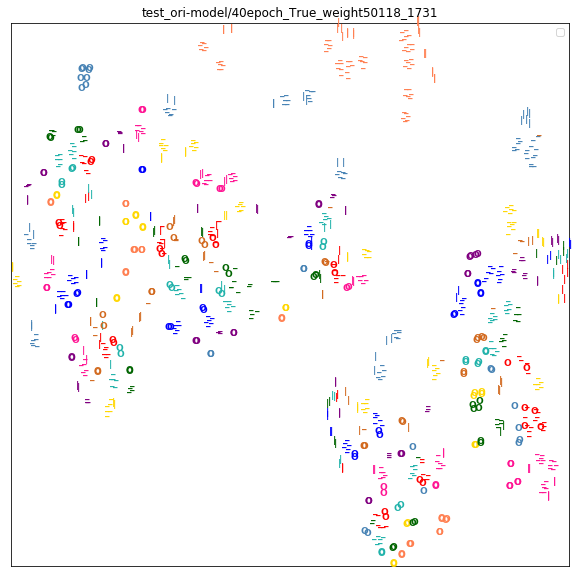

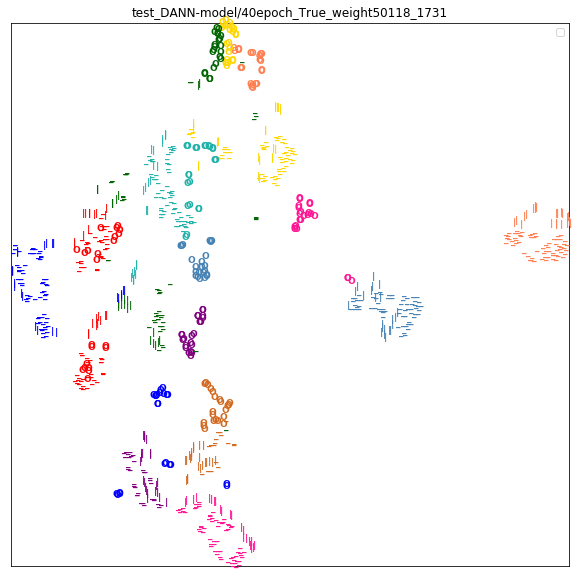

In [18]:
def plot_cluster(X_emd_test, model_name):
    data_amount = 1000
    y_test_ =[]
    X_test_oriemd = X_test.reshape(-1,160*48*1)
    print(X_test.shape)
    print(X_test_oriemd.shape)
    X_test_oriemd = X_test_oriemd[:data_amount]
    y_test_ = y_test[:data_amount]

#     conditions =['B', 'C', 'N']
    conditions =['|', 'O', '_']
    y_temp = []
    for (i, item) in enumerate(y_test_[:,1]):
        if item < 2:
            y_temp.append(conditions[0])
        elif item < 4:
            y_temp.append(conditions[1])
        else:
            y_temp.append(conditions[2])

    #     color =['r', 'g', 'b', 'y', 'm']
    #     color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    #         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    #         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    import matplotlib.colors as colors
#     color = list(colors._colors_full_map.values())
    color = ['#FF0000','#FF1493','#FF7F50','#FFD700','#800080','#006400','#20B2AA','#4682B4',
             '#0000FF','#D2691E','#000000','#00FFFF','#DB7093']
    d = dict([(y,color[x]) for x,y in enumerate(sorted(set(y_test_[:,0])))])
    person_color = [d[x] for x in y_test_[:,0]]
    print(person_color)
    print(y_test_[:,0])

    
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
    X_test_tsne = tsne.fit_transform(X_test_oriemd[:data_amount])

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
    X_test_emd_tsne = tsne.fit_transform(X_emd_test[:data_amount])

    print(X_test_tsne.shape,X_test_emd_tsne.shape,y_test_.shape,len(y_temp))
    model_path = return_modelpath(model_name)
    plot_embedding(X_test_tsne, person_color, y_temp, 'test_ori', model_path)
    plot_embedding(X_test_emd_tsne, person_color, y_temp, 'test_DANN', model_path)
plot_cluster(X_emd_test, model_name)

### plot by self

In [ ]:
# def plot_cluster(X_emd_test, model_name,use_model=True):
data_amount = 1000
y_test_ =[]
X_test_oriemd = X_test.reshape(-1,160*48*1)
print(X_test.shape)
print(X_test_oriemd.shape)
X_test_oriemd = X_test_oriemd[:data_amount]
y_test_ = y_test[:data_amount]

# conditions =['B', 'C', 'N']
conditions =['|', 'O', '_']
y_temp = []
for (i, item) in enumerate(y_test_[:,1]):
    if item < 2:
        y_temp.append(conditions[0])
    elif item < 4:
        y_temp.append(conditions[1])
    else:
        y_temp.append(conditions[2])

#     color =['r', 'g', 'b', 'y', 'm']
    color = ['#FF0000','#FF1493','#FF7F50','#FFD700','#800080','#006400','#20B2AA','#4682B4',
             '#0000FF','#D2691E','#000000','#00FFFF','#DB7093']
#     color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
import matplotlib.colors as colors
import random
# color = list(colors._colors_full_map.values())
# random.shuffle(color)
d = dict([(y,color[x]) for x,y in enumerate(sorted(set(y_test_[:,0])))])
person_color = [d[x] for x in y_test_[:,0]]
print(person_color)
print(y_test_[:,0])


In [ ]:
# lst = list(range(1, 10))
# random.shuffle(lst)
# print(lst)

In [ ]:
w = True
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
X_test_tsne = tsne.fit_transform(X_test_oriemd[:data_amount])

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
X_test_emd_tsne = tsne.fit_transform(X_emd_test[:data_amount])

print(X_test_tsne.shape,X_test_emd_tsne.shape,y_test_.shape,len(y_temp))

In [ ]:
model_path = return_modelpath(model_name)
plot_embedding(X_test_tsne, person_color, y_temp, 'test_ori', model_path)
plot_embedding(X_test_emd_tsne, person_color, y_temp, 'test_DANN_'+str(w), model_path)

## Run different epochs

In [ ]:
# epochs_list = [5,10]
epochs_list = [1,5,10,20,30,40,50,60,70,80,90,100] 
total_probeAcc = []
for i in epochs_list:
    print('epoch= ',i)
    print('\nDomain adaptation training')
    name = 'batch'
#     t = time.strftime("%m%d_%H%M", time.localtime())
    use_model = True
    model_name = str(i)+'epoch_'+str(name)+'_'+str(use_model)
    X_emd_test, his = train_and_evaluate('dann', graph, model,epoches = i ,use_model = use_model,model_name=model_name)
    print( X_emd_test.shape )

    draw_loss(his,model_name,w = 'loss')
    draw_loss(his,model_name,w = 'closs')
    draw_loss(his,model_name,w = 'dloss')
    draw_loss(his,model_name,w = 'dacc')
    
    probe_list = ['nm','bg','cl']
    prob_acc = []
    for probe in probe_list:
#         X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
#         se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe, model_name)
        X_gallery, y_gallery, X_probe, y_probe = pgset(X_emd_test, y_test, probe)
        se_knn = knnRecognition(X_gallery , X_probe, y_gallery, y_probe, probe, model_name)
        mu = acc_matrix2(X_gallery , X_probe, y_gallery, y_probe,probe,model_name)
        prob_acc.append(mu)
    total_probeAcc.append(prob_acc)    
    plot_cluster(X_emd_test, model_name)

In [ ]:
print(prob_acc)
# total_probeAcc.insert(0,prob_acc )
# del total_probeAcc[1]
print(total_probeAcc)
print(type(total_probeAcc))
arr = np.array(total_probeAcc)
epoch_mean= np.mean(arr,axis = 0)
# print(arr[:,0].max(),arr[:,1].max(),arr[:,2].max())
print(epoch_mean)

In [ ]:
t = time.strftime("%m%d_%H%M", time.localtime())
arr = np.array(total_probeAcc)
fig1 = plt.figure(1,figsize=(8, 6))                                           # 创建一个Figure                                                          
ax1 = fig1.add_subplot(1,1,1)                                  # add_subplot()创建一个子图或多个子图                                            
ax1.plot(arr[:,0], 'o-', color = 'blue', label = 'probeNM')       # label设置标签,'o-'代表线型                                                           
ax1.plot(arr[:,1], '>-', color = 'red', label = 'probeBG') 
ax1.plot(arr[:,2], '*-', color = 'green', label = 'probeCL') 
ax1.set_xlabel('epochs',fontsize = 15)                              # 设置x轴的标签, fontsize设置字体大小                                             
ax1.set_ylabel('acc(%)', fontsize = 15)  
ax1.set_xticks(range(len(total_probeAcc))) 
ax1.set_xticklabels(epochs_list)
ax1.grid(True, which='major', axis='y')                      # 设置网格                                                               
ax1.legend(loc = 1, numpoints = 1)    
plt.savefig('df_epoch/df_epoch_meanAcc'+t+'.jpg')# 图例, loc='best',即图例放在最不碍事的位置,numpoint图例上自由一个点                       
plt.show()

import pickle
with open('df_epoch/df_epoch_meanAcc'+t+'.pkl', 'wb') as f:
    pickle.dump(total_probeAcc, f)

In [ ]:
every_batch=[]
every_batch.append([0,1,2,3])
every_batch.append([3,2,11,4])
epoch_avg = np.average(np.array(every_batch), axis=0)
print(every_batch)
print(epoch_avg[0])